# Nursing Home Staffing Exploratory Data Analysis

#### Lets analyze data from CMS to understand nursing home staffing levels and improving care at these facilities

##### Importing libraries below:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
cd data/

##### Lets load payroll based journal data for Q2 2024 
Additional data can be found in the following [link](https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing)

In [ ]:
pbj = pd.read_csv('PBJ_Daily_Nurse_Staffing_Q2_2024.csv', encoding='iso-8859-1')

##### Lets check if everything imported correctly and no missing data in our dataset

In [4]:
pbj.head()

PROVNUM                  PROVNAME          CITY STATE COUNTY_NAME  \
0   15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
1   15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
2   15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
3   15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
4   15009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   

   COUNTY_FIPS  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  ...  Hrs_LPN_ctr  \
0           59  2024Q2  20240401         51      10.77  ...          0.0   
1           59  2024Q2  20240402         52       8.43  ...          0.0   
2           59  2024Q2  20240403         53      11.13  ...          0.0   
3           59  2024Q2  20240404         52      12.27  ...          0.0   
4           59  2024Q2  20240405         52       4.95  ...          0.0   

   Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr  \
0   160.08       160.08          0.0        0.0            0.0            0.0   
1   135.95       135.95          0.0        0.0            0.0            0.0   
2   150.31       150.31          0.0        0.0            0.0            0.0   
3   133.01       133.01          0.0        0.0            0.0            0.0   
4   137.92       137.92          0.0        0.0            0.0            0.0   

   Hrs_MedAide  Hrs_MedAide_emp  Hrs_MedAide_ctr  
0          0.0              0.0              0.0  
1          0.0              0.0              0.0  
2          0.0              0.0              0.0  
3          0.0              0.0              0.0  
4          0.0              0.0              0.0  

[5 rows x 33 columns]

In [5]:
pbj.shape

(1325324, 33)

In [6]:
pbj.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

In [7]:
pbj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325324 entries, 0 to 1325323
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1325324 non-null  object 
 1   PROVNAME          1325324 non-null  object 
 2   CITY              1325324 non-null  object 
 3   STATE             1325324 non-null  object 
 4   COUNTY_NAME       1325324 non-null  object 
 5   COUNTY_FIPS       1325324 non-null  int64  
 6   CY_Qtr            1325324 non-null  object 
 7   WorkDate          1325324 non-null  int64  
 8   MDScensus         1325324 non-null  int64  
 9   Hrs_RNDON         1325324 non-null  float64
 10  Hrs_RNDON_emp     1325324 non-null  float64
 11  Hrs_RNDON_ctr     1325324 non-null  float64
 12  Hrs_RNadmin       1325324 non-null  float64
 13  Hrs_RNadmin_emp   1325324 non-null  float64
 14  Hrs_RNadmin_ctr   1325324 non-null  float64
 15  Hrs_RN            1325324 non-null  float64
 16  

In [8]:
pbj.describe()

COUNTY_FIPS      WorkDate     MDScensus     Hrs_RNDON  Hrs_RNDON_emp  \
count  1.325324e+06  1.325324e+06  1.325324e+06  1.325324e+06   1.325324e+06   
mean   9.113430e+01  2.024052e+07  8.341670e+01  5.195887e+00   5.099312e+00   
std    9.912806e+01  8.167078e+01  4.904109e+01  4.389664e+00   4.382255e+00   
min    1.000000e+00  2.024040e+07  0.000000e+00  0.000000e+00   0.000000e+00   
25%    3.100000e+01  2.024042e+07  5.100000e+01  0.000000e+00   0.000000e+00   
50%    6.900000e+01  2.024052e+07  7.600000e+01  8.000000e+00   8.000000e+00   
75%    1.170000e+02  2.024061e+07  1.040000e+02  8.000000e+00   8.000000e+00   
max    8.400000e+02  2.024063e+07  7.420000e+02  1.039600e+02   1.039600e+02   

       Hrs_RNDON_ctr   Hrs_RNadmin  Hrs_RNadmin_emp  Hrs_RNadmin_ctr  \
count   1.325324e+06  1.325324e+06     1.325324e+06     1.325324e+06   
mean    9.657448e-02  1.026275e+01     1.001164e+01     2.511122e-01   
std     9.182349e-01  1.476875e+01     1.455953e+01     1.845270e+00   
min     0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
25%     0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
50%     0.000000e+00  7.500000e+00     7.500000e+00     0.000000e+00   
75%     0.000000e+00  1.600000e+01     1.600000e+01     0.000000e+00   
max     2.575000e+01  2.755000e+02     2.755000e+02     8.725000e+01   

             Hrs_RN  ...   Hrs_LPN_ctr       Hrs_CNA   Hrs_CNA_emp  \
count  1.325324e+06  ...  1.325324e+06  1.325324e+06  1.325324e+06   
mean   3.480192e+01  ...  6.133439e+00  1.737908e+02  1.616093e+02   
std    3.532269e+01  ...  1.963754e+01  1.151591e+02  1.081243e+02   
min    0.000000e+00  ...  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.325000e+01  ...  0.000000e+00  9.857000e+01  9.025000e+01   
50%    2.575000e+01  ...  0.000000e+00  1.506200e+02  1.400000e+02   
75%    4.525000e+01  ...  4.000000e+00  2.200000e+02  2.074800e+02   
max    9.159800e+02  ...  1.380150e+04  1.758100e+03  1.503630e+03   

        Hrs_CNA_ctr     Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr   Hrs_MedAide  \
count  1.325324e+06  1.325324e+06   1.325324e+06   1.325324e+06  1.325324e+06   
mean   1.218150e+01  4.314155e+00   4.262067e+00   5.208815e-02  8.578327e+00   
std    3.184142e+01  1.336067e+01   1.302080e+01   2.011555e+00  1.785970e+01   
min    0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
75%    8.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00  1.131000e+01   
max    6.614200e+02  4.437500e+02   4.387500e+02   2.470000e+02  4.298000e+02   

       Hrs_MedAide_emp  Hrs_MedAide_ctr  
count     1.325324e+06     1.325324e+06  
mean      8.363303e+00     2.150232e-01  
std       1.749784e+01     2.104964e+00  
min       0.000000e+00     0.000000e+00  
25%       0.000000e+00     0.000000e+00  
50%       0.000000e+00     0.000000e+00  
75%       1.087000e+01     0.000000e+00  
max       4.298000e+02     8.775000e+01  

[8 rows x 27 columns]

In [9]:
pbj.isnull().sum().sort_values(ascending=False)
   

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [10]:
pbj.isna().sum().sort_values(ascending=False)

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

##### Everything looks great. The data has imported correctly. No missing data. Reviewing the columns we can see what is stored in the dataset and since we're interested in looking at staffing levels lets isolate those columns 

In [11]:
pbj_copy = pbj[['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr']]

In [12]:
pbj_copy.isna().sum().sort_values(ascending=False)

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [13]:
pbj_copy

PROVNUM                       PROVNAME          CITY STATE  \
0         15009       BURNS NURSING HOME, INC.  RUSSELLVILLE    AL   
1         15009       BURNS NURSING HOME, INC.  RUSSELLVILLE    AL   
2         15009       BURNS NURSING HOME, INC.  RUSSELLVILLE    AL   
3         15009       BURNS NURSING HOME, INC.  RUSSELLVILLE    AL   
4         15009       BURNS NURSING HOME, INC.  RUSSELLVILLE    AL   
...         ...                            ...           ...   ...   
1325319  745040  THE SARAH ROBERTS FRENCH HOME   SAN ANTONIO    TX   
1325320  745040  THE SARAH ROBERTS FRENCH HOME   SAN ANTONIO    TX   
1325321  745040  THE SARAH ROBERTS FRENCH HOME   SAN ANTONIO    TX   
1325322  745040  THE SARAH ROBERTS FRENCH HOME   SAN ANTONIO    TX   
1325323  745040  THE SARAH ROBERTS FRENCH HOME   SAN ANTONIO    TX   

        COUNTY_NAME  CY_Qtr  WorkDate  MDScensus  Hrs_RNDON  Hrs_RNDON_emp  \
0          Franklin  2024Q2  20240401         51      10.77          10.77   
1          Franklin  2024Q2  20240402         52       8.43           8.43   
2          Franklin  2024Q2  20240403         53      11.13          11.13   
3          Franklin  2024Q2  20240404         52      12.27          12.27   
4          Franklin  2024Q2  20240405         52       4.95           4.95   
...             ...     ...       ...        ...        ...            ...   
1325319       Bexar  2024Q2  20240626         44       8.00           8.00   
1325320       Bexar  2024Q2  20240627         44       8.00           8.00   
1325321       Bexar  2024Q2  20240628         45       8.00           8.00   
1325322       Bexar  2024Q2  20240629         45       0.00           0.00   
1325323       Bexar  2024Q2  20240630         45       0.00           0.00   

         ...  Hrs_LPN_ctr  Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  Hrs_NAtrn  \
0        ...          0.0   160.08       160.08          0.0        0.0   
1        ...          0.0   135.95       135.95          0.0        0.0   
2        ...          0.0   150.31       150.31          0.0        0.0   
3        ...          0.0   133.01       133.01          0.0        0.0   
4        ...          0.0   137.92       137.92          0.0        0.0   
...      ...          ...      ...          ...          ...        ...   
1325319  ...          0.0    93.99        93.99          0.0        0.0   
1325320  ...          0.0    85.99        85.99          0.0        0.0   
1325321  ...          0.0    74.05        74.05          0.0        0.0   
1325322  ...          0.0    55.44        55.44          0.0        0.0   
1325323  ...          0.0    66.81        66.81          0.0        0.0   

         Hrs_NAtrn_emp  Hrs_NAtrn_ctr  Hrs_MedAide  Hrs_MedAide_emp  \
0                  0.0            0.0         0.00             0.00   
1                  0.0            0.0         0.00             0.00   
2                  0.0            0.0         0.00             0.00   
3                  0.0            0.0         0.00             0.00   
4                  0.0            0.0         0.00             0.00   
...                ...            ...          ...              ...   
1325319            0.0            0.0        15.60            15.60   
1325320            0.0            0.0        13.70            13.70   
1325321            0.0            0.0        17.18            17.18   
1325322            0.0            0.0        20.92            20.92   
1325323            0.0            0.0        13.58            13.58   

         Hrs_MedAide_ctr  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
1325319              0.0  
1325320              0.0  
1325321              0.0  
1325322              0.0  
1325323              0.0  

[1325324 rows x 32 columns]

##### Now we can look at additional nursing home data. This is broken down by month so we import Apr, May and  data  for 2024 - eventually we will merge this into a single dataset for Q2 2024 data. The data can be found in the following [link](https://data.cms.gov/provider-data/topics/nursing-homes)

In [ ]:
cd nursing_homes_including_rehab_services_04_2024

In [15]:
nhp_apr = pd.read_csv('NH_ProviderInfo_Apr2024.csv')

In [16]:
nhp_apr.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number',
       'Provider SSA County Code', 'County/Parish', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Affiliated Entity Name', 'Affiliated Entity ID',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating

In [ ]:
cd .. 

In [ ]:
cd nursing_homes_including_rehab_services_05_2024/

In [19]:
nhp_may = pd.read_csv('NH_ProviderInfo_May2024.csv')

In [ ]:
cd .. 

In [ ]:
cd nursing_homes_including_rehab_services_06_2024/

In [22]:
nhp_jun = pd.read_csv('NH_ProviderInfo_Jun2024.csv')

##### Lets create a Q2 2024 dataset by merging the Apr, May and June 2024 Data. This will combine to create our Q2 dataset

In [23]:
nhp_q2 = pd.concat([nhp_apr, nhp_may, nhp_jun])

In [24]:
nhp_q2.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number',
       'Provider SSA County Code', 'County/Parish', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Affiliated Entity Name', 'Affiliated Entity ID',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating

In [25]:
nhp_q2.head()

CMS Certification Number (CCN)                                Provider Name  \
0                         015009                     BURNS NURSING HOME, INC.   
1                         015010               COOSA VALLEY HEALTHCARE CENTER   
2                         015012                   HIGHLANDS HEALTH AND REHAB   
3                         015014  EASTVIEW REHABILITATION & HEALTHCARE CENTER   
4                         015015                PLANTATION MANOR NURSING HOME   

              Provider Address     City/Town State  ZIP Code  \
0         701 MONROE STREET NW  RUSSELLVILLE    AL     35653   
1       260 WEST WALNUT STREET     SYLACAUGA    AL     35150   
2          380 WOODS COVE ROAD    SCOTTSBORO    AL     35768   
3     7755 FOURTH AVENUE SOUTH    BIRMINGHAM    AL     35206   
4  6450 OLD TUSCALOOSA HIGHWAY      MC CALLA    AL     35111   

   Telephone Number  Provider SSA County Code County/Parish  \
0        2563324110                       290      Franklin   
1        2562495604                       600     Talladega   
2        2562183708                       350       Jackson   
3        2058330146                       360     Jefferson   
4        2054776161                       360     Jefferson   

             Ownership Type  ...  \
0  For profit - Corporation  ...   
1  For profit - Corporation  ...   
2       Government - County  ...   
3   For profit - Individual  ...   
4   For profit - Individual  ...   

   Number of Citations from Infection Control Inspections  Number of Fines  \
0                                                NaN                     2   
1                                                0.0                     0   
2                                                NaN                     0   
3                                                0.0                     0   
4                                                NaN                     1   

   Total Amount of Fines in Dollars Number of Payment Denials  \
0                          24644.14                         0   
1                              0.00                         0   
2                              0.00                         0   
3                              0.00                         0   
4                            975.00                         0   

  Total Number of Penalties                                       Location  \
0                         2     701 MONROE STREET NW,RUSSELLVILLE,AL,35653   
1                         0      260 WEST WALNUT STREET,SYLACAUGA,AL,35150   
2                         0        380 WOODS COVE ROAD,SCOTTSBORO,AL,35768   
3                         0   7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206   
4                         1  6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111   

  Latitude Longitude  Geocoding Footnote Processing Date  
0  34.5149   -87.736                 NaN      2024-04-01  
1  33.1637   -86.254                 NaN      2024-04-01  
2  34.6611   -86.047                 NaN      2024-04-01  
3  33.5595   -86.722                 NaN      2024-04-01  
4  33.3221   -87.034                 NaN      2024-04-01  

[5 rows x 100 columns]

In [26]:
nhp_q2_clean = nhp_q2[['Provider Name', 'Provider Address',
       'City/Town', 'State',
       'County/Parish', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Continuing Care Retirement Community',
       'Abuse Icon',
       'Overall Rating',
       'Health Inspection Rating',
       'QM Rating',
       'Long-Stay QM Rating',
       'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
       'Case-Mix LPN Staffing Hours per Resident per Day',
       'Case-Mix RN Staffing Hours per Resident per Day',
       'Case-Mix Total Nurse Staffing Hours per Resident per Day',
       'Adjusted Nurse Aide Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
       'Adjusted Weekend Total Nurse Staffing Hours per Resident per Day',
       'Total Weighted Health Survey Score',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints',
       'Number of Fines', 'Total Amount of Fines in Dollars',
       'Number of Payment Denials', 'Total Number of Penalties']]

In [27]:
nhp_q2_clean.shape

(44563, 43)

In [28]:
nhp_q2_clean.columns

Index(['Provider Name', 'Provider Address', 'City/Town', 'State',
       'County/Parish', 'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Continuing Care Retirement Community', 'Abuse Icon', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating',
       'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Reported Physical Th

In [29]:
nhp_q2_clean.isnull().sum().sort_values(ascending=False)


Long-Stay QM Rating                                                      1681
Adjusted LPN Staffing Hours per Resident per Day                         1298
Adjusted RN Staffing Hours per Resident per Day                          1298
Adjusted Weekend Total Nurse Staffing Hours per Resident per Day         1298
Adjusted Nurse Aide Staffing Hours per Resident per Day                  1298
Adjusted Total Nurse Staffing Hours per Resident per Day                 1298
Total number of nurse staff hours per resident per day on the weekend    1230
Registered Nurse hours per resident per day on the weekend               1230
Case-Mix Total Nurse Staffing Hours per Resident per Day                 1230
Case-Mix LPN Staffing Hours per Resident per Day                         1230
Reported Physical Therapist Staffing Hours per Resident Per Day          1230
Case-Mix Nurse Aide Staffing Hours per Resident per Day                  1230
Case-Mix RN Staffing Hours per Resident per Day                 

In [30]:
nhp_q2_clean2 = nhp_q2_clean[['Provider Name', 'Provider Address', 'City/Town', 'State',
       'County/Parish', 'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Provider Type',
       'Legal Business Name',
       'Abuse Icon', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating',
       'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Total Weighted Health Survey Score',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Number of Payment Denials',
       'Total Number of Penalties']]

In [31]:
nhp_q2_clean2.describe()

Number of Certified Beds  Average Number of Residents per Day  \
count              44563.000000                         44341.000000   
mean                 106.906559                            81.579412   
std                   59.244058                            48.347041   
min                    4.000000                             1.000000   
25%                   66.000000                            49.400000   
50%                  100.000000                            74.100000   
75%                  128.000000                           102.100000   
max                  843.000000                           728.500000   

       Overall Rating  Health Inspection Rating     QM Rating  \
count    44120.000000              44120.000000  43875.000000   
mean         2.851677                  2.786741      3.493607   
std          1.429560                  1.273555      1.271494   
min          1.000000                  1.000000      1.000000   
25%          2.000000                  2.000000      3.000000   
50%          3.000000                  3.000000      4.000000   
75%          4.000000                  4.000000      5.000000   
max          5.000000                  5.000000      5.000000   

       Staffing Rating  \
count     43944.000000   
mean          2.656313   
std           1.297675   
min           1.000000   
25%           1.000000   
50%           3.000000   
75%           4.000000   
max           5.000000   

       Reported Nurse Aide Staffing Hours per Resident per Day  \
count                                       43333.000000         
mean                                            2.258376         
std                                             0.583376         
min                                             0.000000         
25%                                             1.896540         
50%                                             2.175480         
75%                                             2.531260         
max                                            10.471010         

       Reported LPN Staffing Hours per Resident per Day  \
count                                      43333.000000   
mean                                           0.874887   
std                                            0.366250   
min                                            0.000000   
25%                                            0.652370   
50%                                            0.863460   
75%                                            1.059040   
max                                            5.314250   

       Reported RN Staffing Hours per Resident per Day  \
count                                     43333.000000   
mean                                          0.650999   
std                                           0.481218   
min                                           0.000000   
25%                                           0.385910   
50%                                           0.550400   
75%                                           0.776800   
max                                           8.705490   

       Reported Licensed Staffing Hours per Resident per Day  ...  \
count                                       43333.000000      ...   
mean                                            1.525886      ...   
std                                             0.576619      ...   
min                                             0.000000      ...   
25%                                             1.240130      ...   
50%                                             1.430700      ...   
75%                                             1.669630      ...   
max                                             8.927850      ...   

       Total number of nurse staff hours per resident per day on the weekend  \
count                                       43333.000000                       
mean                                            3.313972                       
std                      

In [32]:
nhp_q2_grp = nhp_q2_clean2.groupby(['Provider Name', 'Provider Address', 'City/Town', 'State',
       'County/Parish', 'Ownership Type', 'Provider Type',
       'Legal Business Name', 'Abuse Icon']).mean()

In [33]:
nhp_q2_grp = nhp_q2_grp.reset_index()

In [34]:
nhp_q2_grp.head()

Provider Name              Provider Address  \
0                              15 CRAIGSIDE            15 CRAIGSIDE PLACE   
1                                24TH PLACE     600 24TH AVENUE SOUTHWEST   
2                                   60 WEST                60 WEST STREET   
3          A GRACE SUB ACUTE & SKILLED CARE  1250 S. WINCHESTER BOULEVARD   
4  A HOLLY PATTERSON EXTENDED CARE FACILITY          875 JERUSALEM AVENUE   

    City/Town State County/Parish            Ownership Type  \
0    HONOLULU    HI      Honolulu  Non profit - Corporation   
1      NORMAN    OK     Cleveland   For profit - Individual   
2  ROCKY HILL    CT      Hartford  For profit - Corporation   
3    SAN JOSE    CA   Santa Clara  For profit - Corporation   
4   UNIONDALE    NY        Nassau        Government - State   

           Provider Type             Legal Business Name Abuse Icon  \
0               Medicare  CRAIGSIDE RETIREMENT RESIDENCE          N   
1  Medicare and Medicaid                  24TH PLACE LLC          N   
2  Medicare and Medicaid          SECURECARE OPTIONS LLC          Y   
3  Medicare and Medicaid                 LITA & AVA INC.          N   
4  Medicare and Medicaid  NASSAU HEALTH CARE CORPORATION          N   

   Number of Certified Beds  ...  \
0                      45.0  ...   
1                      89.0  ...   
2                      95.0  ...   
3                     166.0  ...   
4                     589.0  ...   

   Total number of nurse staff hours per resident per day on the weekend  \
0                                            4.12362                       
1                                            2.79740                       
2                                            3.60752                       
3                                            4.64830                       
4                                            2.31646                       

   Registered Nurse hours per resident per day on the weekend  \
0                                            1.37277            
1                                            0.20533            
2                                            0.34423            
3                                            1.02150            
4                                            0.39343            

   Reported Physical Therapist Staffing Hours per Resident Per Day  \
0                                            0.09588                 
1                                            0.00272                 
2                                            0.00954                 
3                                            0.04976                 
4                                            0.03315                 

   Total Weighted Health Survey Score  Number of Facility Reported Incidents  \
0                            4.667000                                    0.0   
1                          123.333000                                    0.0   
2                           39.333000                                    0.0   
3                           82.222333                                    0.0   
4                          112.000333                                    0.0   

   Number of Substantiated Complaints  Number of Fines  \
0                            0.000000              0.0   
1                           22.000000              1.0   
2                            0.000000              0.0   
3                            6.666667              1.0   
4                            0.000000              3.0   

   Total Amount of Fines in Dollars  Number of Payment Denials  \
0                          0.000000                        0.0   
1                       5438.000000                        0.0   
2                          0.000000                        0.0   
3                       7003.750000                        0.0   
4                      67301.403333                        0.0   

   Total Number of Penalties  
0                

In [35]:
pbj_clean = pbj[['PROVNAME', 'CITY', 'STATE', 'CY_Qtr','MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr']]

In [36]:
pbj_grp1 = pbj_clean.groupby(['PROVNAME', 'CITY', 'STATE', 'CY_Qtr']).mean()

In [37]:
pbj_grp1.reset_index(inplace=True)
pbj_grp1.head()


PROVNAME        CITY STATE  CY_Qtr  \
0                              15 CRAIGSIDE    HONOLULU    HI  2024Q2   
1                                24TH PLACE      NORMAN    OK  2024Q2   
2                                   60 WEST  ROCKY HILL    CT  2024Q2   
3          A GRACE SUB ACUTE & SKILLED CARE    SAN JOSE    CA  2024Q2   
4  A HOLLY PATTERSON EXTENDED CARE FACILITY   UNIONDALE    NY  2024Q2   

    MDScensus  Hrs_RNDON  Hrs_RNDON_emp  Hrs_RNDON_ctr  Hrs_RNadmin  \
0   43.274725   2.967033       2.967033            0.0    19.275714   
1   68.758242   5.561099       5.561099            0.0     6.428132   
2   92.582418   5.524725       5.524725            0.0    20.681319   
3  102.439560   4.747253       4.747253            0.0     0.000000   
4  467.384615   3.925824       3.925824            0.0     4.568681   

   Hrs_RNadmin_emp  ...  Hrs_LPN_ctr     Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  \
0        19.275714  ...     0.000000  120.622747   120.622747     0.000000   
1         6.428132  ...     0.000000  119.243516   119.243516     0.000000   
2        20.637363  ...     9.390989  244.871758   244.464835     0.406923   
3         0.000000  ...     0.000000  279.782967   279.782967     0.000000   
4         4.568681  ...     2.060440  947.222527   927.420330    19.802198   

   Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr  Hrs_MedAide  Hrs_MedAide_emp  \
0   1.881429       1.881429            0.0     0.000000         0.000000   
1   0.000000       0.000000            0.0    36.975824        36.975824   
2   0.000000       0.000000            0.0     0.000000         0.000000   
3   0.000000       0.000000            0.0     0.000000         0.000000   
4   0.000000       0.000000            0.0     0.000000         0.000000   

   Hrs_MedAide_ctr  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 29 columns]

In [38]:
pbj_grp1.rename(columns = {'PROVNAME' : 'Provider Name'}, inplace = True)

In [39]:
pbj_grp1.columns

Index(['Provider Name', 'CITY', 'STATE', 'CY_Qtr', 'MDScensus', 'Hrs_RNDON',
       'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp',
       'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

In [40]:
nhp_q2_grp.columns

Index(['Provider Name', 'Provider Address', 'City/Town', 'State',
       'County/Parish', 'Ownership Type', 'Provider Type',
       'Legal Business Name', 'Abuse Icon', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Total Weighted Health Survey Score',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints

In [41]:
pbj_grp1.head()

Provider Name        CITY STATE  CY_Qtr  \
0                              15 CRAIGSIDE    HONOLULU    HI  2024Q2   
1                                24TH PLACE      NORMAN    OK  2024Q2   
2                                   60 WEST  ROCKY HILL    CT  2024Q2   
3          A GRACE SUB ACUTE & SKILLED CARE    SAN JOSE    CA  2024Q2   
4  A HOLLY PATTERSON EXTENDED CARE FACILITY   UNIONDALE    NY  2024Q2   

    MDScensus  Hrs_RNDON  Hrs_RNDON_emp  Hrs_RNDON_ctr  Hrs_RNadmin  \
0   43.274725   2.967033       2.967033            0.0    19.275714   
1   68.758242   5.561099       5.561099            0.0     6.428132   
2   92.582418   5.524725       5.524725            0.0    20.681319   
3  102.439560   4.747253       4.747253            0.0     0.000000   
4  467.384615   3.925824       3.925824            0.0     4.568681   

   Hrs_RNadmin_emp  ...  Hrs_LPN_ctr     Hrs_CNA  Hrs_CNA_emp  Hrs_CNA_ctr  \
0        19.275714  ...     0.000000  120.622747   120.622747     0.000000   
1         6.428132  ...     0.000000  119.243516   119.243516     0.000000   
2        20.637363  ...     9.390989  244.871758   244.464835     0.406923   
3         0.000000  ...     0.000000  279.782967   279.782967     0.000000   
4         4.568681  ...     2.060440  947.222527   927.420330    19.802198   

   Hrs_NAtrn  Hrs_NAtrn_emp  Hrs_NAtrn_ctr  Hrs_MedAide  Hrs_MedAide_emp  \
0   1.881429       1.881429            0.0     0.000000         0.000000   
1   0.000000       0.000000            0.0    36.975824        36.975824   
2   0.000000       0.000000            0.0     0.000000         0.000000   
3   0.000000       0.000000            0.0     0.000000         0.000000   
4   0.000000       0.000000            0.0     0.000000         0.000000   

   Hrs_MedAide_ctr  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 29 columns]

##### Now that we have two different Q2 2024 datasets. Lets combine both datasets and start exploring to find any data insights

In [42]:
df_comp = pd.merge(pbj_grp1, nhp_q2_grp, on = 'Provider Name', how = 'inner')

In [43]:
pbj_grp1.shape

(14562, 29)

In [44]:
nhp_q2_grp.shape

(16427, 30)

In [45]:
df_comp.columns

Index(['Provider Name', 'CITY', 'STATE', 'CY_Qtr', 'MDScensus', 'Hrs_RNDON',
       'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp',
       'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr', 'Provider Address', 'City/Town', 'State',
       'County/Parish', 'Ownership Type', 'Provider Type',
       'Legal Business Name', 'Abuse Icon', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staff

In [46]:
df_comp.describe()

MDScensus     Hrs_RNDON  Hrs_RNDON_emp  Hrs_RNDON_ctr   Hrs_RNadmin  \
count  16280.000000  16280.000000   16280.000000   16280.000000  16280.000000   
mean      83.312830      5.199100       5.104579       0.094522     10.243991   
std       48.777665      1.791369       1.860483       0.645570     11.639425   
min        1.417582      0.000000       0.000000       0.000000      0.000000   
25%       50.571429      4.857143       4.835165       0.000000      2.236813   
50%       75.884615      5.362637       5.351648       0.000000      7.230769   
75%      104.241758      5.697802       5.626374       0.000000     14.246621   
max      732.263736     57.880659      57.880659      11.440440    167.252418   

       Hrs_RNadmin_emp  Hrs_RNadmin_ctr        Hrs_RN    Hrs_RN_emp  \
count     16280.000000     16280.000000  16280.000000  16280.000000   
mean          9.997557         0.246433     34.612262     31.768918   
std          11.484236         1.378265     32.689262     29.645534   
min           0.000000         0.000000      0.000000      0.000000   
25%           1.991319         0.000000     15.662088     14.129533   
50%           6.958132         0.000000     26.626484     24.664286   
75%          13.890110         0.000000     43.646071     40.243379   
max         167.252418        60.815934    795.917802    768.738901   

         Hrs_RN_ctr  ...  \
count  16280.000000  ...   
mean       2.843343  ...   
std        9.418801  ...   
min        0.000000  ...   
25%        0.000000  ...   
50%        0.000000  ...   
75%        1.747253  ...   
max      336.783626  ...   

       Total number of nurse staff hours per resident per day on the weekend  \
count                                       15997.000000                       
mean                                            3.296696                       
std                                             0.834300                       
min                                             0.007560                       
25%                                             2.827610                       
50%                                             3.162200                       
75%                                             3.617820                       
max                                            10.437050                       

       Registered Nurse hours per resident per day on the weekend  \
count                                       15997.000000            
mean                                            0.442899            
std                                             0.382783            
min                                             0.000000            
25%                                             0.238460            
50%                                             0.359110            
75%                                             0.530890            
max                                             8.623290            

       Reported Physical Therapist Staffing Hours per Resident Per Day  \
count                                       15997.000000                 
mean                                            0.068985                 
std                                             0.084470                 
min                                             0.000000                 
25%                                             0.020690                 
50%                                             0.049820                 
75%                                             0.088150                 
max                                             2.285620                 

       Total Weighted Health Survey Score  \
count                        16229.000000   
mean                            77.241884   
std                             84.615905   
min                              0.000000   
25%                             26.000000   
50%                             50.444667   
75%                             96.611000   
max              

In [47]:
df_comp.isna().sum().sort_values(ascending=False).head(25)

Registered Nurse hours per resident per day on the weekend               283
Reported Physical Therapist Staffing Hours per Resident Per Day          283
Reported Nurse Aide Staffing Hours per Resident per Day                  283
Reported LPN Staffing Hours per Resident per Day                         283
Reported RN Staffing Hours per Resident per Day                          283
Reported Licensed Staffing Hours per Resident per Day                    283
Total number of nurse staff hours per resident per day on the weekend    283
Reported Total Nurse Staffing Hours per Resident per Day                 283
QM Rating                                                                206
Staffing Rating                                                          171
Overall Rating                                                           143
Health Inspection Rating                                                 143
Total Weighted Health Survey Score                                        51

In [48]:
df_comp_clean = df_comp.dropna(subset=["Registered Nurse hours per resident per day on the weekend", 'QM Rating', 'Overall Rating'])

In [49]:
df_comp_clean.isna().sum().sort_values(ascending=False).head(25)

Provider Name       0
CITY                0
STATE               0
CY_Qtr              0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
dtype: int64

In [50]:
df_comp_clean.shape

(15839, 58)

##### Quick sanity check to make sure no nursing homes have only contract workers and no full time workers. 

In [51]:
print(df_comp_clean[(df_comp_clean['Hrs_RNDON_ctr'] > 0) & (df_comp_clean['Hrs_RNDON'] == 0)])
print(df_comp_clean[(df_comp_clean['Hrs_RNadmin_ctr'] > 0) & (df_comp_clean['Hrs_RNadmin'] == 0)])
print(df_comp_clean[(df_comp_clean['Hrs_RN_ctr'] > 0) & (df_comp_clean['Hrs_RN'] == 0)])
print(df_comp_clean[(df_comp_clean['Hrs_LPNadmin_ctr'] > 0) & (df_comp_clean['Hrs_LPNadmin'] == 0)])
print(df_comp_clean[(df_comp_clean['Hrs_LPN_ctr'] > 0) & (df_comp_clean['Hrs_LPN'] == 0)])
print(df_comp_clean[(df_comp_clean['Hrs_CNA_ctr'] > 0) & (df_comp_clean['Hrs_CNA'] == 0)])
print(df_comp_clean[(df_comp_clean['Hrs_NAtrn_ctr'] > 0) & (df_comp_clean['Hrs_NAtrn'] == 0)])
print(df_comp_clean[(df_comp_clean['Hrs_MedAide_ctr'] > 0) & (df_comp_clean['Hrs_MedAide'] == 0)])

Empty DataFrame
Columns: [Provider Name, CITY, STATE, CY_Qtr, MDScensus, Hrs_RNDON, Hrs_RNDON_emp, Hrs_RNDON_ctr, Hrs_RNadmin, Hrs_RNadmin_emp, Hrs_RNadmin_ctr, Hrs_RN, Hrs_RN_emp, Hrs_RN_ctr, Hrs_LPNadmin, Hrs_LPNadmin_emp, Hrs_LPNadmin_ctr, Hrs_LPN, Hrs_LPN_emp, Hrs_LPN_ctr, Hrs_CNA, Hrs_CNA_emp, Hrs_CNA_ctr, Hrs_NAtrn, Hrs_NAtrn_emp, Hrs_NAtrn_ctr, Hrs_MedAide, Hrs_MedAide_emp, Hrs_MedAide_ctr, Provider Address, City/Town, State, County/Parish, Ownership Type, Provider Type, Legal Business Name, Abuse Icon, Number of Certified Beds, Average Number of Residents per Day, Overall Rating, Health Inspection Rating, QM Rating, Staffing Rating, Reported Nurse Aide Staffing Hours per Resident per Day, Reported LPN Staffing Hours per Resident per Day, Reported RN Staffing Hours per Resident per Day, Reported Licensed Staffing Hours per Resident per Day, Reported Total Nurse Staffing Hours per Resident per Day, Total number of nurse staff hours per resident per day on the weekend, Registered 

In [ ]:
df_comp_clean['ratio_RNDON'] = np.where(df_comp_clean['Hrs_RNDON'] != 0, df_comp_clean['Hrs_RNDON_ctr'] / df_comp_clean['Hrs_RNDON'], 0)
df_comp_clean['ratio_RNadmin'] = np.where(df_comp_clean['Hrs_RNadmin'] != 0, df_comp_clean['Hrs_RNadmin_ctr'] / df_comp_clean['Hrs_RNadmin'], 0)   
df_comp_clean['ratio_RN'] = np.where(df_comp_clean['Hrs_RN'] != 0, df_comp_clean['Hrs_RN_ctr'] / df_comp_clean['Hrs_RN'], 0)   
df_comp_clean['ratio_LPNadmin'] = np.where(df_comp_clean['Hrs_LPNadmin'] != 0, df_comp_clean['Hrs_LPNadmin_ctr'] / df_comp_clean['Hrs_LPNadmin'], 0)   
df_comp_clean['ratio_LPN'] = np.where(df_comp_clean['Hrs_LPN'] != 0, df_comp_clean['Hrs_LPN_ctr'] / df_comp_clean['Hrs_LPN'], 0)   
df_comp_clean['ratio_CNA'] = np.where(df_comp_clean['Hrs_CNA'] != 0, df_comp_clean['Hrs_CNA_ctr'] / df_comp_clean['Hrs_CNA'], 0)   
df_comp_clean['ratio_NAtrn'] = np.where(df_comp_clean['Hrs_NAtrn'] != 0, df_comp_clean['Hrs_NAtrn_ctr'] / df_comp_clean['Hrs_NAtrn'], 0)   
df_comp_clean['ratio_MedAide'] = np.where(df_comp_clean['Hrs_MedAide'] != 0, df_comp_clean['Hrs_MedAide_ctr'] / df_comp_clean['Hrs_MedAide'], 0)   


In [53]:
df_comp_clean.isna().sum().sort_values(ascending=False).head(25)

Provider Name       0
CITY                0
STATE               0
CY_Qtr              0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
dtype: int64

In [54]:
df_comp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15839 entries, 0 to 16279
Data columns (total 66 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Provider Name                                                          15839 non-null  object 
 1   CITY                                                                   15839 non-null  object 
 2   STATE                                                                  15839 non-null  object 
 3   CY_Qtr                                                                 15839 non-null  object 
 4   MDScensus                                                              15839 non-null  float64
 5   Hrs_RNDON                                                              15839 non-null  float64
 6   Hrs_RNDON_emp                                                          15839 non-null  floa

##### Our ratio columns have been successfully created, so now lets dive into the dataset

In [55]:
df_comp_clean.columns

Index(['Provider Name', 'CITY', 'STATE', 'CY_Qtr', 'MDScensus', 'Hrs_RNDON',
       'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp',
       'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr', 'Provider Address', 'City/Town', 'State',
       'County/Parish', 'Ownership Type', 'Provider Type',
       'Legal Business Name', 'Abuse Icon', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staff

In [56]:
df_comp_clean1 = df_comp_clean[['Provider Name', 'CITY', 'STATE', 'CY_Qtr', 'County/Parish', 'Ownership Type', 'Provider Type', 'Abuse Icon', 'MDScensus', 'Hrs_RNDON',
       'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp',
       'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr','Number of Certified Beds',
       'Average Number of Residents per Day', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Total Weighted Health Survey Score',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Number of Payment Denials',
       'Total Number of Penalties', 'ratio_RNDON', 'ratio_RNadmin', 'ratio_RN',
       'ratio_LPNadmin', 'ratio_LPN', 'ratio_CNA', 'ratio_NAtrn',
       'ratio_MedAide']]

In [57]:
df_comp_clean1['STATE'].value_counts().sort_values(ascending=False)

STATE
TX    1313
CA    1263
OH     970
FL     792
IL     786
IN     706
PA     692
NY     619
MO     512
MI     451
NC     434
IA     425
GA     378
MN     371
MA     363
NJ     360
WI     335
KS     317
TN     313
VA     292
KY     290
OK     285
LA     272
CO     236
MD     235
AR     220
AL     219
MS     211
WA     195
CT     195
SC     190
NE     189
AZ     145
WV     137
OR     130
UT     103
SD      99
ME      83
RI      81
ID      78
NH      78
NM      77
NV      70
ND      67
MT      63
DE      54
HI      40
WY      38
VT      33
DC      19
AK      15
Name: count, dtype: int64

In [58]:
df_comp_clean_grp = df_comp_clean1.groupby(['Provider Name', 'CITY', 'STATE', 'CY_Qtr', 'County/Parish', 'Ownership Type', 'Provider Type', 'Abuse Icon']).mean()
df_comp_clean_grp.reset_index(inplace=True)


In [121]:
# Creating a uniform color palette for the plots 
palette = sns.color_palette("Set2", n_colors=16)
sns.set_palette(palette)
sns.set_style("darkgrid")

Text(0.5, 0, 'Overall Rating')

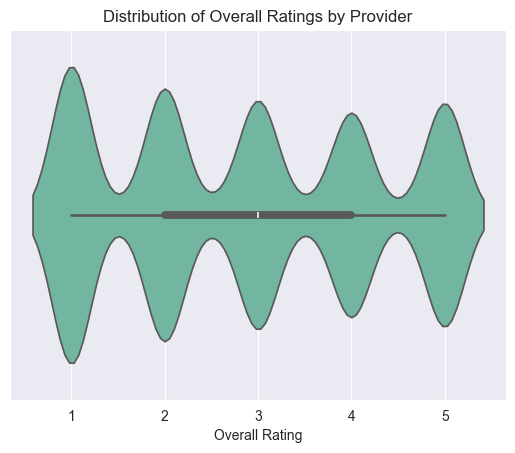

In [122]:
sns.violinplot(x=df_comp_clean_grp["Overall Rating"])
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")

##### We see a slight higher bump of 1 rating facility. Lets try to understand what is driving down the rating

Text(0.5, 1.0, 'Distribution of Staffing Ratings by Provider')

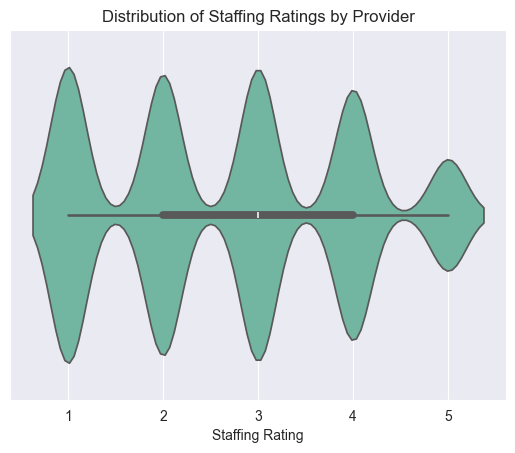

In [123]:
sns.violinplot(x=df_comp_clean_grp["Staffing Rating"])
plt.title("Distribution of Staffing Ratings by Provider")

##### For our staffing rating we see a small number of providers that have a 5 rating but an average around 3 which is good to see.  

In [98]:
df_comp_clean_num = df_comp_clean[['MDScensus', 'Hrs_RNDON',
       'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp',
       'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr','Number of Certified Beds',
       'Average Number of Residents per Day', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Total Weighted Health Survey Score',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Number of Payment Denials',
       'Total Number of Penalties', 'ratio_RNDON', 'ratio_RNadmin', 'ratio_RN',
       'ratio_LPNadmin', 'ratio_LPN', 'ratio_CNA', 'ratio_NAtrn',
       'ratio_MedAide']]

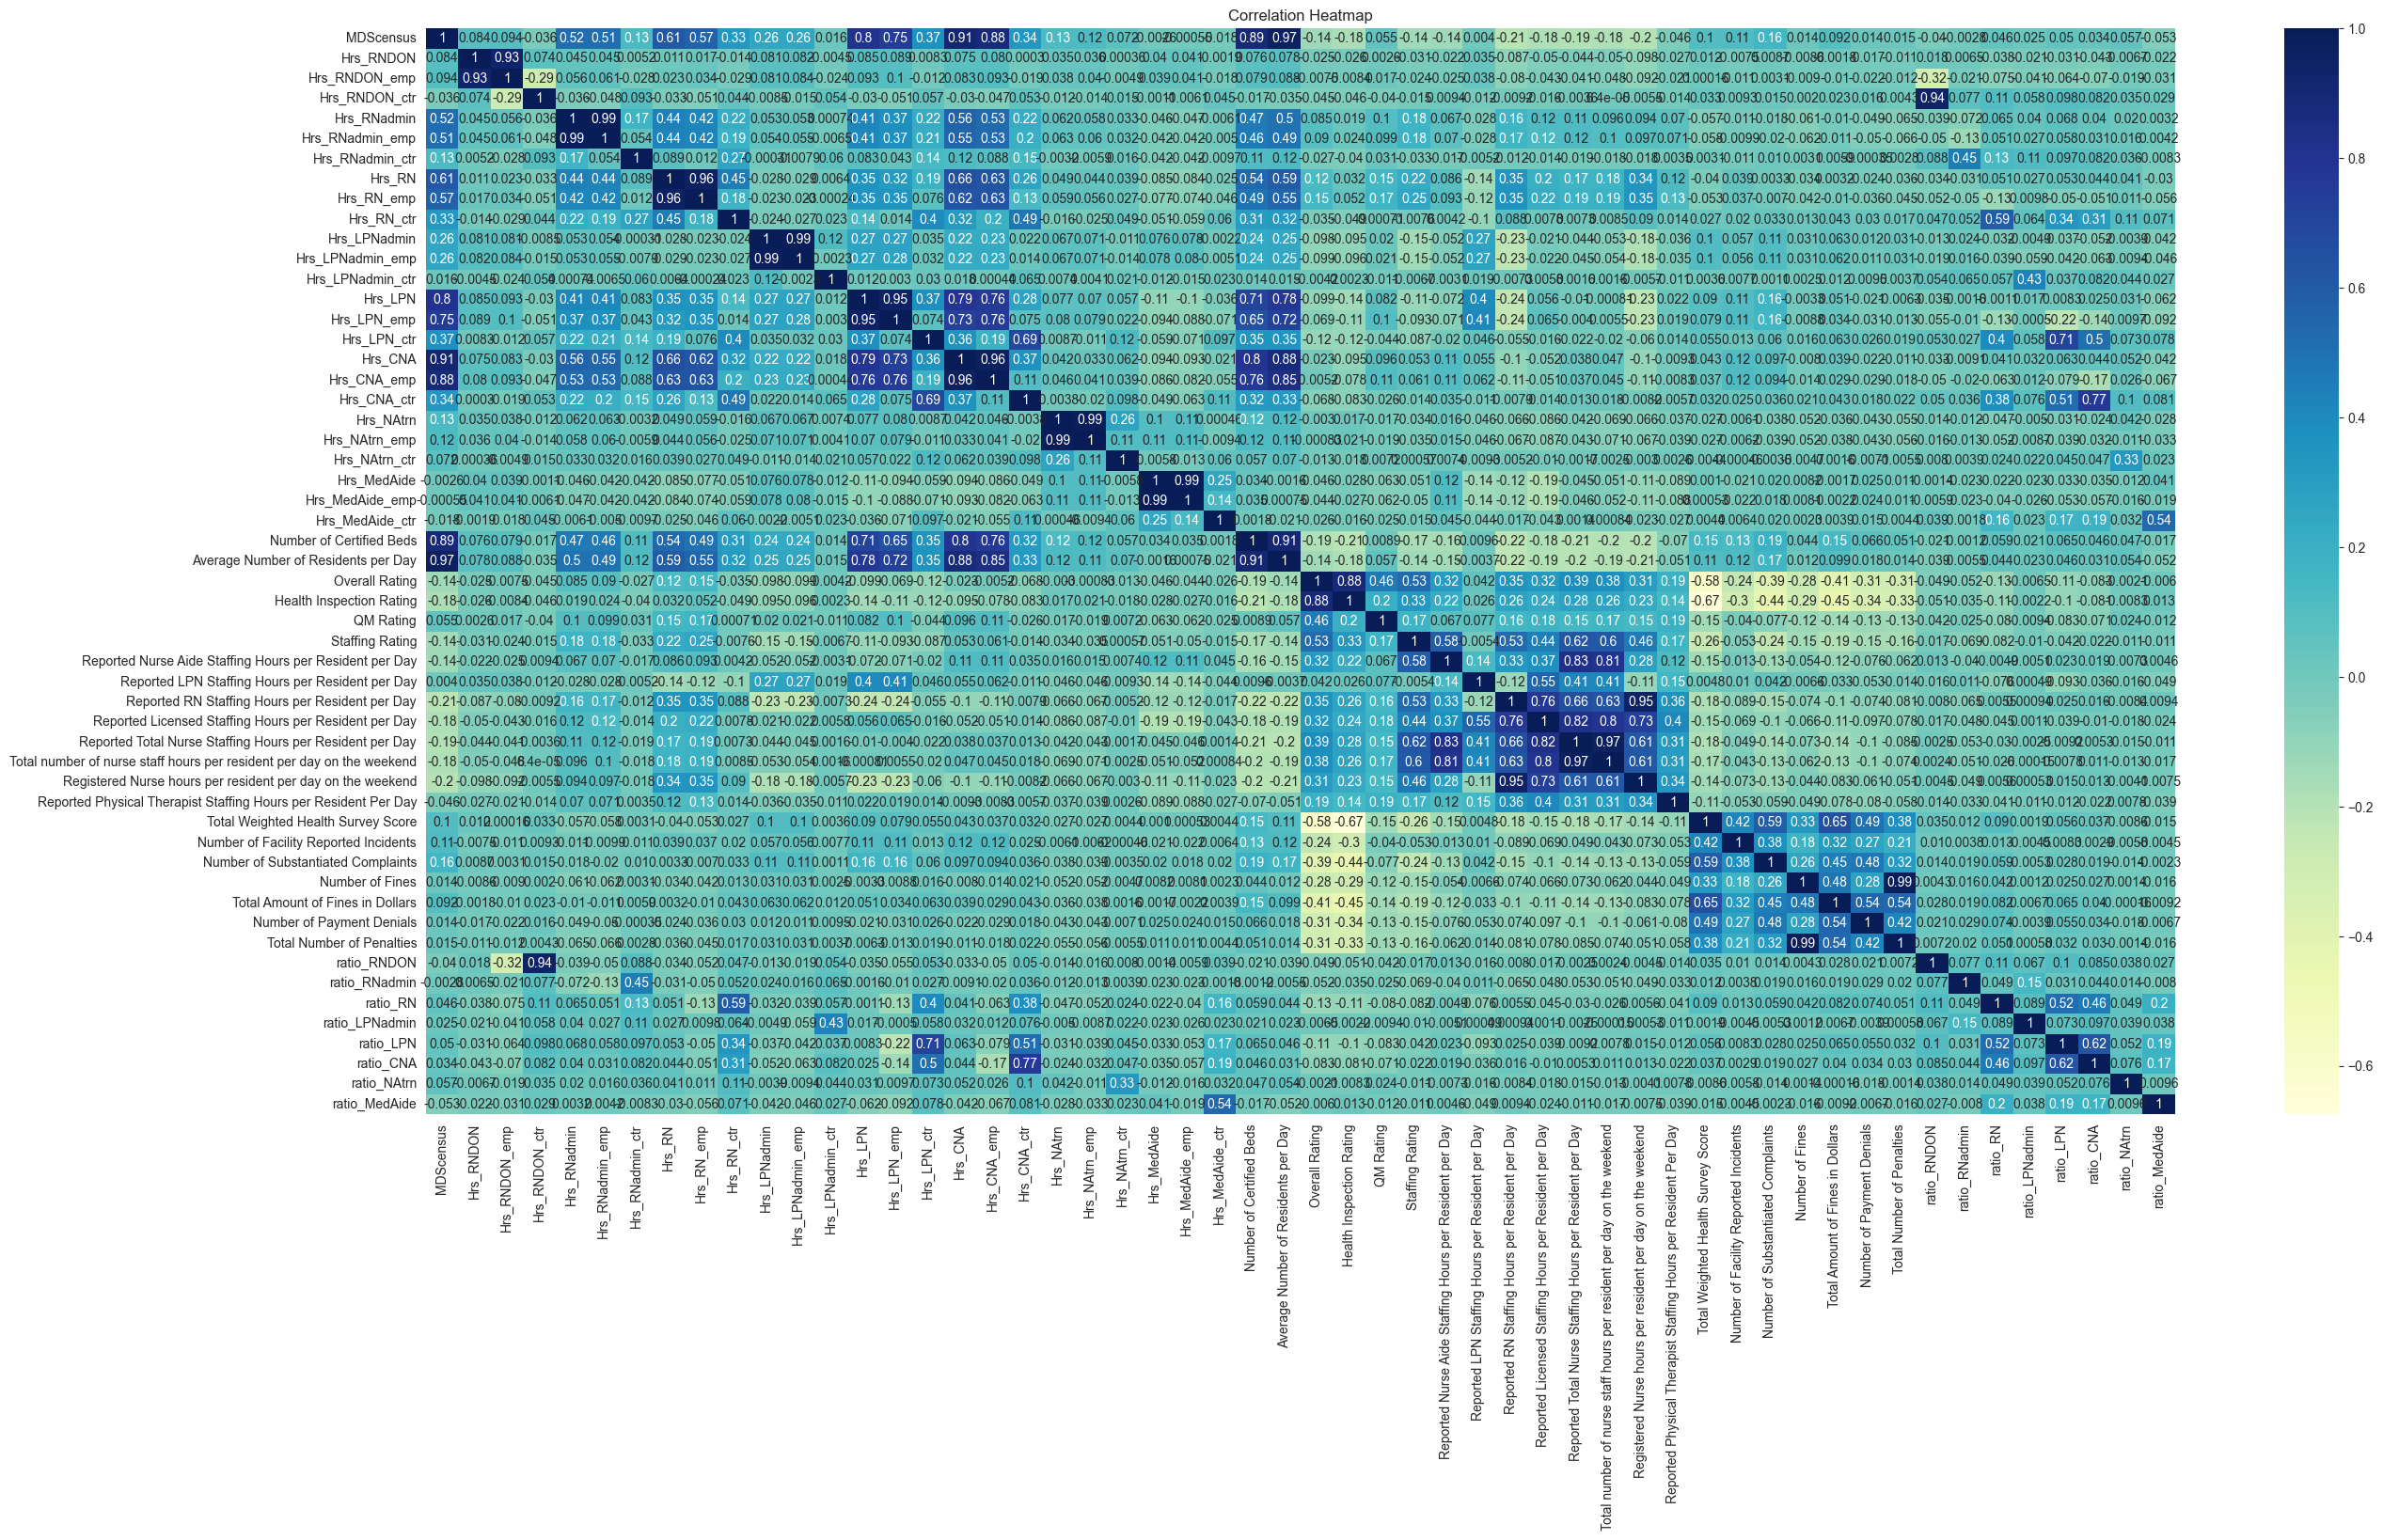

In [101]:
correlation_matrix = df_comp_clean_num.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap = "YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

##### Good start but a little crowded. Lets see if we can simplify and look at the features that are impacting staffing rating in nursing facilities accross the US. 

##### Lets see if we can limit to staffing rating

In [65]:
df_comp_clean_staffing_hrs2 = df_comp_clean[['Overall Rating', 'Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Total Number of Penalties', 'ratio_RNDON', 'ratio_RNadmin', 'ratio_RN',
       'ratio_LPNadmin', 'ratio_LPN', 'ratio_CNA', 'ratio_NAtrn',
       'ratio_MedAide','Hrs_RNDON',
       'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp',
       'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr']]

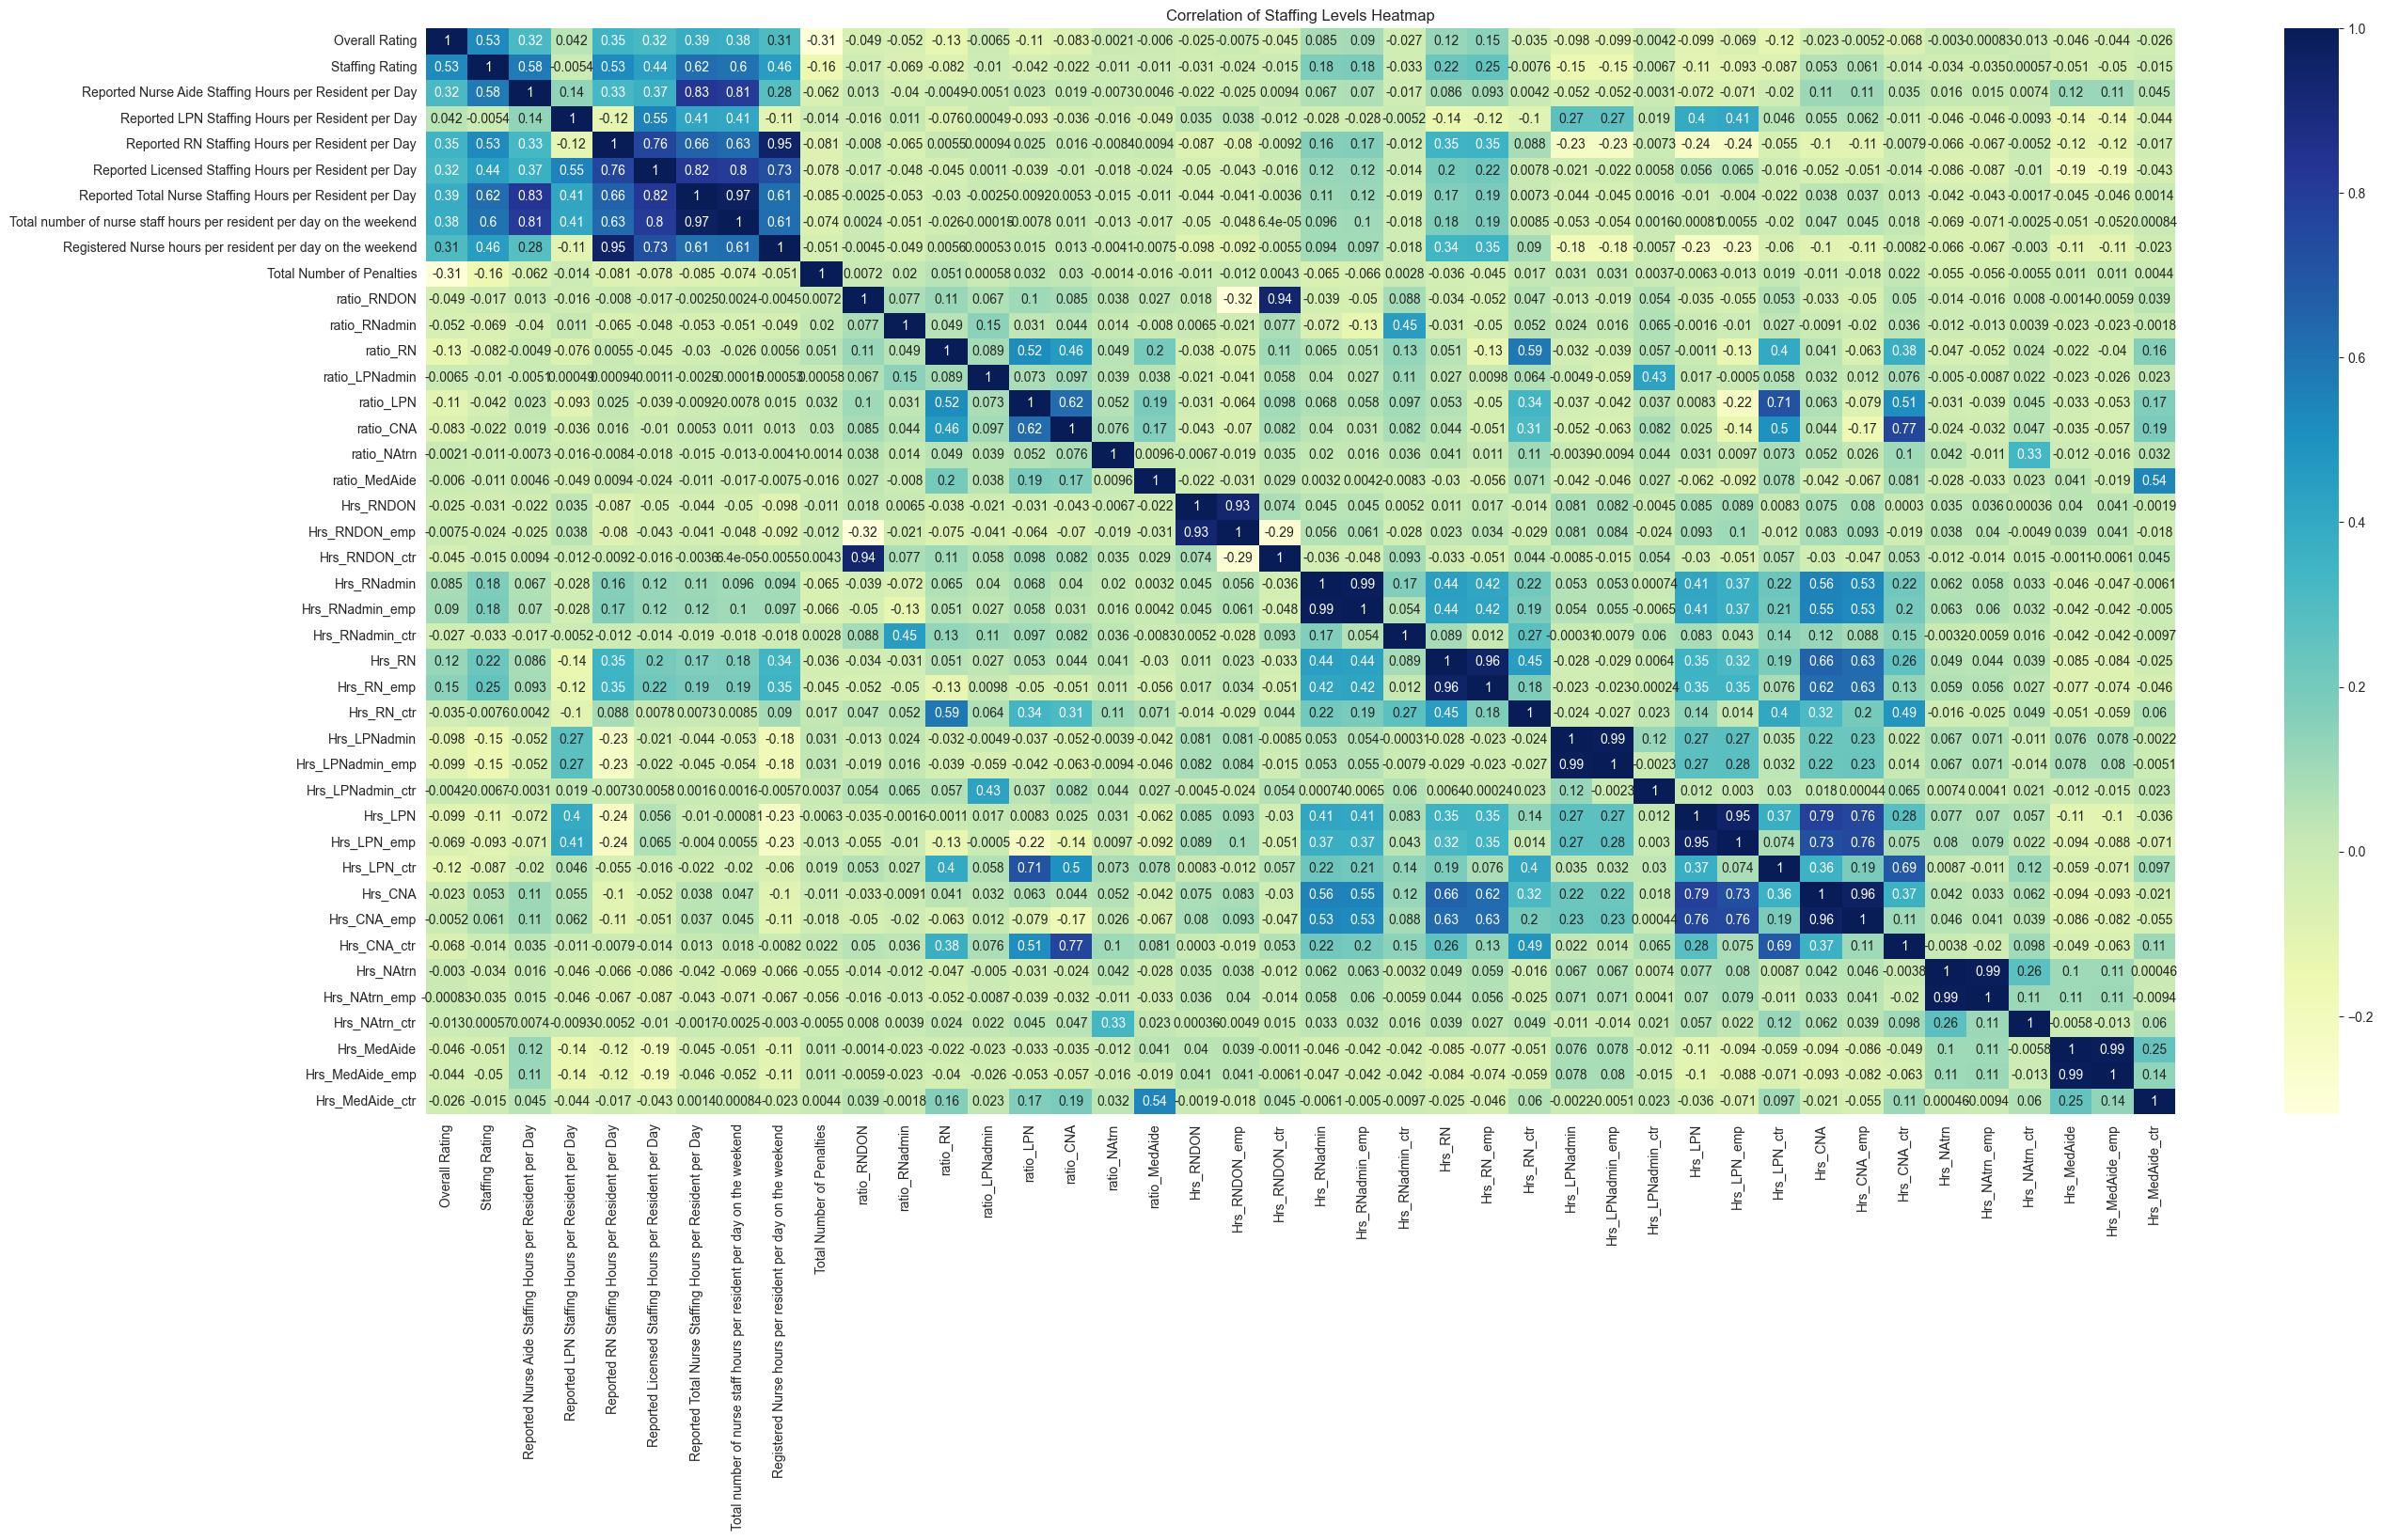

In [166]:
correlation_matrix_smaller2 = df_comp_clean_staffing_hrs2.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix_smaller2, annot=True, cmap="YlGnBu")
plt.title('Correlation of Staffing Levels Heatmap')
plt.show()

##### This is a much easier to read heatmap. We see for staffing rating that the reported number of nursing hours and different types of staff is the largest impact for the staffing rating. 

In [106]:
df_state_avg = df_comp_clean1.groupby("STATE", as_index=False).mean(numeric_only=True)

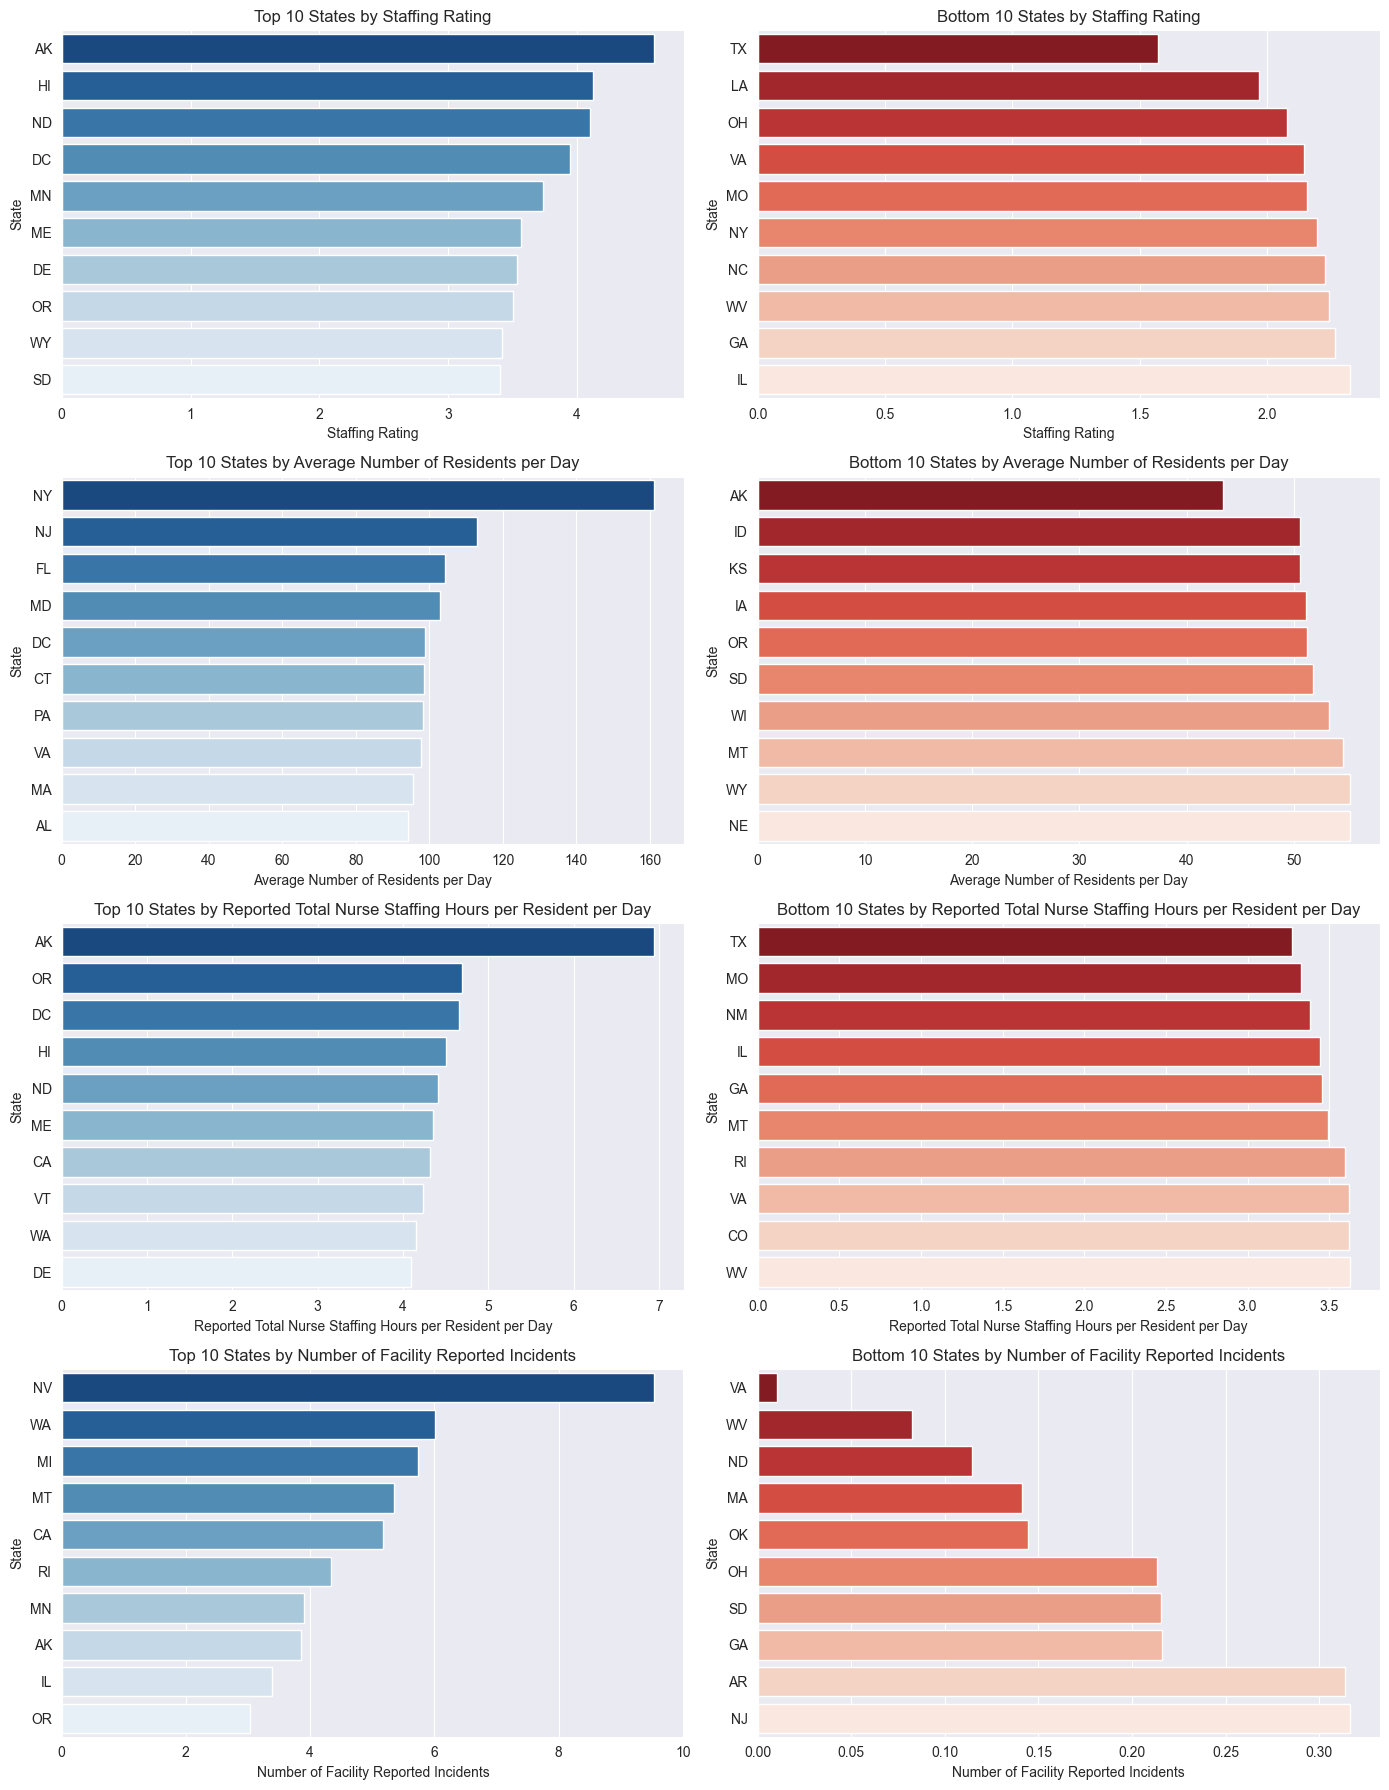

In [124]:
# Set style - aligning with previous settings
sns.set_style("darkgrid")

# Metrics to analyze
metrics = ["Staffing Rating", "Average Number of Residents per Day", "Reported Total Nurse Staffing Hours per Resident per Day", "Number of Facility Reported Incidents"]

# Filter only available columns
available_metrics = [metric for metric in metrics if metric in df_state_avg.columns]

# Create subplots with correct dimensions
fig, axes = plt.subplots(len(available_metrics), 2, figsize=(14, 18))

for i, metric in enumerate(available_metrics):
    df_metric = df_state_avg[["STATE", metric]].dropna()
    df_sorted = df_metric.sort_values(by=metric, ascending=False)

    top_states = df_sorted.head(10)
    bottom_states = df_sorted.tail(10)

    sns.barplot(x=top_states[metric], y=top_states["STATE"], hue= top_states["STATE"], ax=axes[i, 0], palette= "Blues_r", legend = False)
    axes[i, 0].set_title(f"Top 10 States by {metric}")
    axes[i, 0].set_xlabel(metric)
    axes[i, 0].set_ylabel("State")

    sns.barplot(x=bottom_states[metric], y=bottom_states["STATE"], hue= bottom_states["STATE"],  ax=axes[i, 1], palette=sns.color_palette("Reds_r", n_colors=10)[::-1], legend = False)
    axes[i, 1].invert_yaxis()  
    axes[i, 1].set_title(f"Bottom 10 States by {metric}")
    axes[i, 1].set_xlabel(metric)
    axes[i, 1].set_ylabel("State")

# Adjust layout
plt.tight_layout()
plt.show()

##### From this visualization we see a breakdown by each state. It is interesting to see New York having the highest number of residents but ranked bottom 10 with staffing rating. More reason to see how to help these providers increase staffing rating for these facilities. 

Text(0.5, 1.0, 'Total Nurse Staffing Hours vs Staffing Rating')

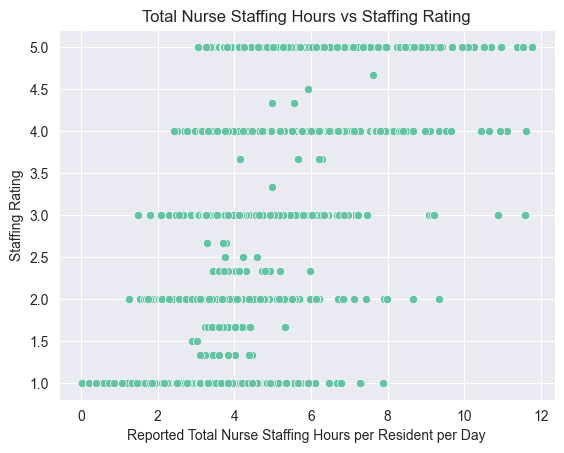

In [154]:
sns.scatterplot(x=df_comp_clean_grp['Reported Total Nurse Staffing Hours per Resident per Day'], y=df_comp_clean_grp['Staffing Rating']) 
plt.title('Total Nurse Staffing Hours vs Staffing Rating')

##### We see a correlation with the number of nursing hours and staffing rating. So we see lower staffing ratings with a lower number of reported nurse staffing and higher rating for higher number of reported total nurse staffing hours. 

Text(0.5, 1.0, 'Total Amount of Fines vs Staffing Rating')

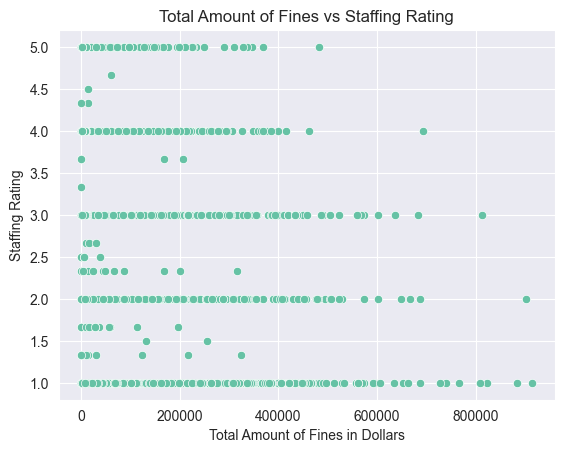

In [155]:
sns.scatterplot(x=df_comp_clean_grp['Total Amount of Fines in Dollars'], y=df_comp_clean_grp['Staffing Rating'])
plt.title('Total Amount of Fines vs Staffing Rating')

##### There is also a correlation with the amount of fines and staffing rating as well. Facilities with a higher staffing rating are unlikely to have fines vs. facilities with a lower staffing rating. 

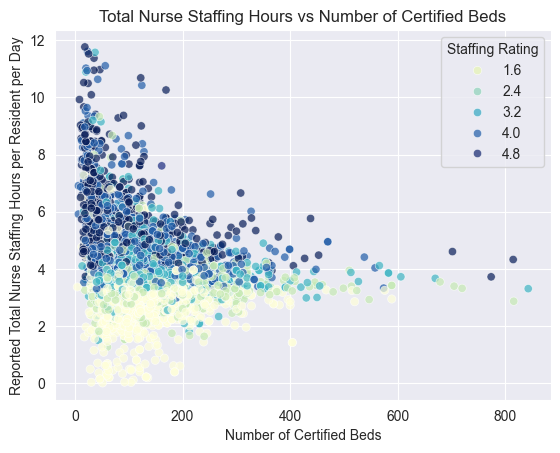

In [152]:
sns.scatterplot(
    data=df_comp_clean_grp,
    x='Number of Certified Beds',
    y='Reported Total Nurse Staffing Hours per Resident per Day',
    hue='Staffing Rating',
    palette="YlGnBu",
    alpha=0.7
)
plt.title('Total Nurse Staffing Hours vs Number of Certified Beds')
plt.xlabel('Number of Certified Beds')
plt.show()


##### This is a really good visual to see that facilities should try to stay higher than 4 nurse staffing hours per resident and less than 200 beds to maintain a high staffing level. 

Text(0.5, 1.0, 'Total Nurse Staffing Hours vs Average Number of Residents per Day')

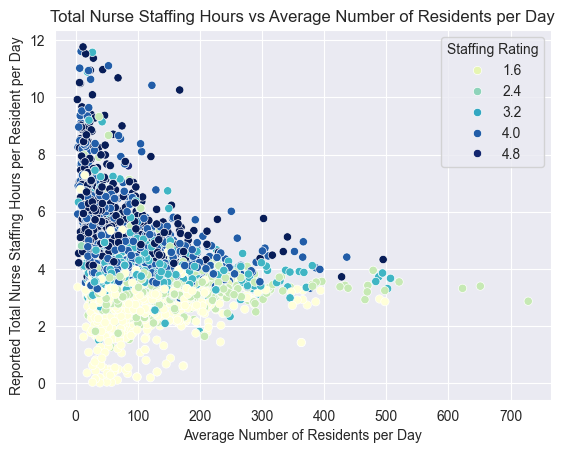

In [153]:
sns.scatterplot(x=df_comp_clean_grp['Average Number of Residents per Day'], y=df_comp_clean_grp['Reported Total Nurse Staffing Hours per Resident per Day'], hue=df_comp_clean_grp['Staffing Rating'], palette="YlGnBu")
plt.title('Total Nurse Staffing Hours vs Average Number of Residents per Day')

##### Similar results as from our previous graph. The insights remain the same, as we would love to have facilities to have staffing at least 4 hours or more per resident and less than 200-300 residents per day to maintain a high staffing level. 

Text(0.5, 1.0, 'Total Amount of Fines vs Total Nurse Staffing Hours')

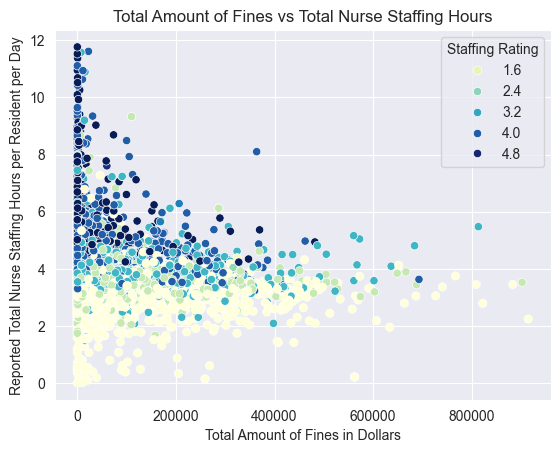

In [156]:
sns.scatterplot(x=df_comp_clean_grp['Total Amount of Fines in Dollars'], y=df_comp_clean_grp['Reported Total Nurse Staffing Hours per Resident per Day'], hue=df_comp_clean_grp['Staffing Rating'], palette= "YlGnBu")
plt.title('Total Amount of Fines vs Total Nurse Staffing Hours') 

In [175]:
df_comp_clean_grp[['Staffing Rating', 'Overall Rating', 'Number of Certified Beds', 'Reported Total Nurse Staffing Hours per Resident per Day','Average Number of Residents per Day', 'Total Amount of Fines in Dollars']].describe()

Staffing Rating  Overall Rating  Number of Certified Beds  \
count     15516.000000    15516.000000              15516.000000   
mean          2.673498        2.843473                107.864366   
std           1.283640        1.422100                 58.562363   
min           1.000000        1.000000                  4.000000   
25%           2.000000        2.000000                 68.000000   
50%           3.000000        3.000000                100.000000   
75%           4.000000        4.000000                128.000000   
max           5.000000        5.000000                843.000000   

       Reported Total Nurse Staffing Hours per Resident per Day  \
count                                       15516.000000          
mean                                            3.765816          
std                                             0.916169          
min                                             0.009230          
25%                                             3.237130          
50%                                             3.614915          
75%                                             4.111282          
max                                            11.764900          

       Average Number of Residents per Day  Total Amount of Fines in Dollars  
count                         15516.000000                      15516.000000  
mean                             82.295611                      36946.528621  
std                              48.048049                      75636.894681  
min                               2.900000                          0.000000  
25%                              50.300000                          0.000000  
50%                              74.800000                       7900.750000  
75%                             102.700000                      34992.750000  
max                             728.500000                     914633.120000

##### Looking at the actual number the average staffing rating is 2.67 so less than 3. More important for these facilities to employ more nursing staff to provide adequate care for their residents. Total Nurse hours is less than 4 which we've seen in our visualization is less than ideal. It's nice to see the average of number of beds is ~100 which is where we want our facilities to be at. 

<Axes: title={'center': 'Resident levels by State'}, xlabel='STATE'>

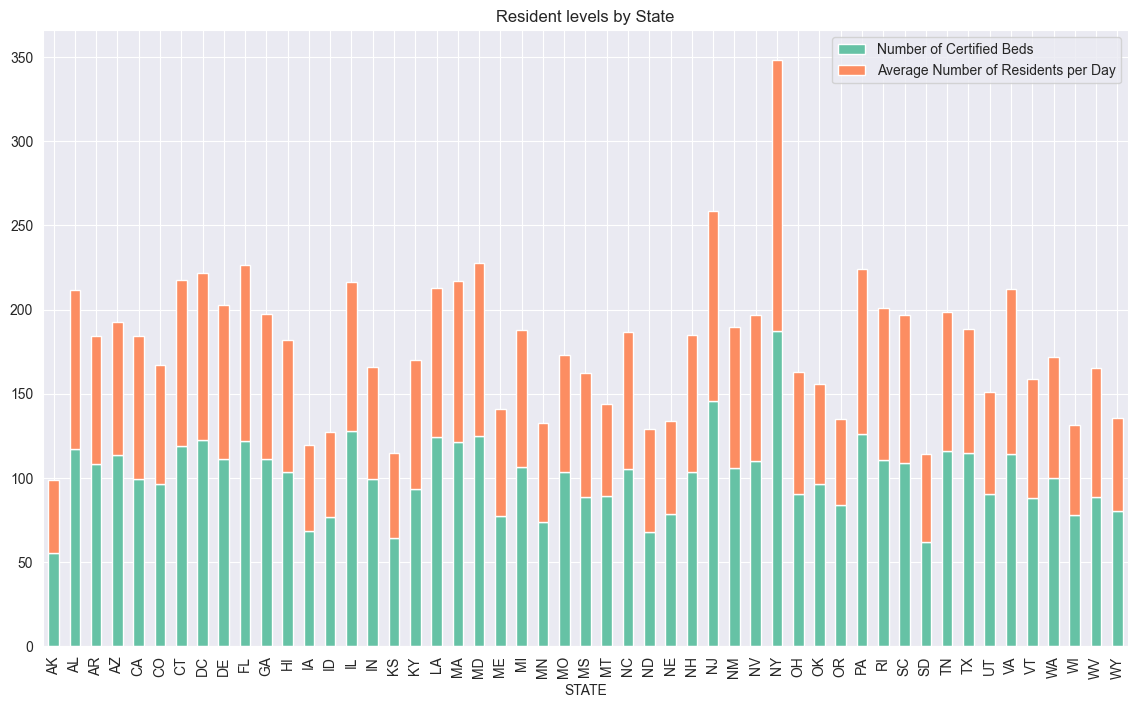

In [159]:
df_state_avg.plot.bar(x='STATE', y=['Number of Certified Beds', 'Average Number of Residents per Day'],stacked = True ,title='Resident levels by State', figsize=(14, 8))


##### Good to see most facilities are filled with residents

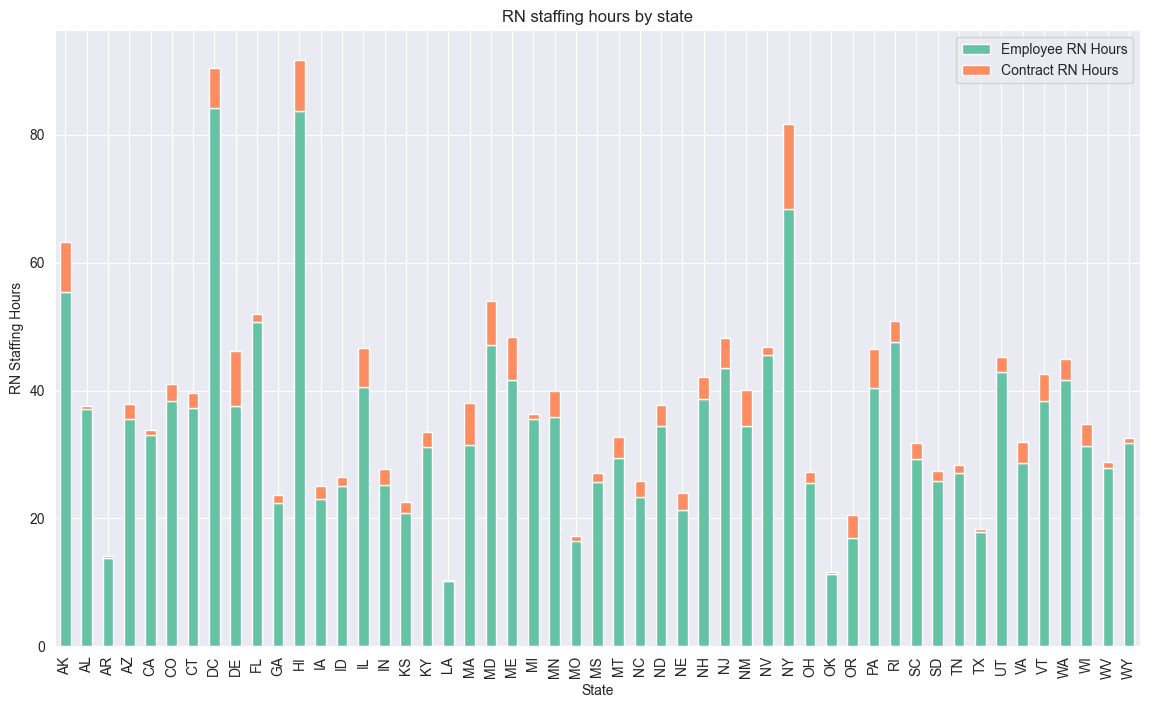

In [113]:
# Stacked Bar Plot - RN staffing levels by state
df_state_avg.plot.bar(x='STATE', y=['Hrs_RN_emp', 'Hrs_RN_ctr'], stacked=True, title='RN staffing hours by state', figsize=(14, 8), color=sns.color_palette("Set2", n_colors=2))
plt.xlabel('State')
plt.ylabel('RN Staffing Hours')
plt.legend(['Employee RN Hours', 'Contract RN Hours']) 
plt.show()

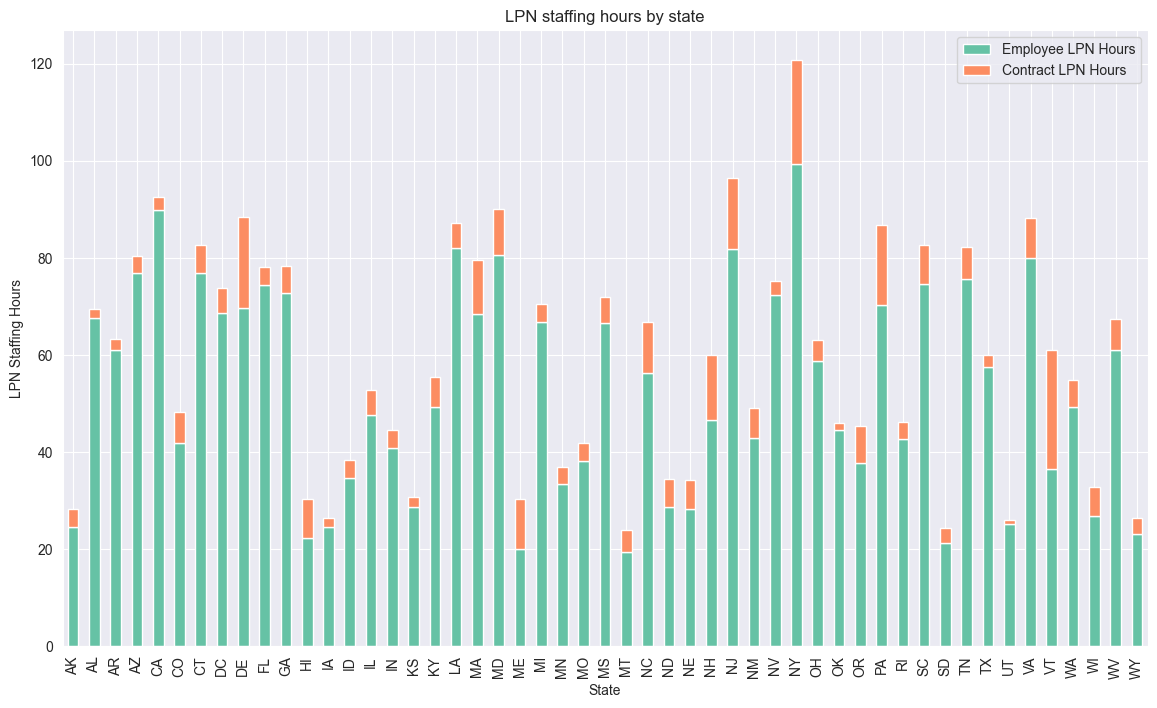

In [114]:
 # Stacked Bar Plot - LPN staffing levels by state
df_state_avg.plot.bar(x='STATE', y=['Hrs_LPN_emp', 'Hrs_LPN_ctr'], stacked=True, title='LPN staffing hours by state', figsize=(14, 8), color = sns.color_palette("Set2", n_colors=2))
plt.xlabel('State')
plt.ylabel('LPN Staffing Hours')
plt.legend(['Employee LPN Hours', 'Contract LPN Hours']) 
plt.show()

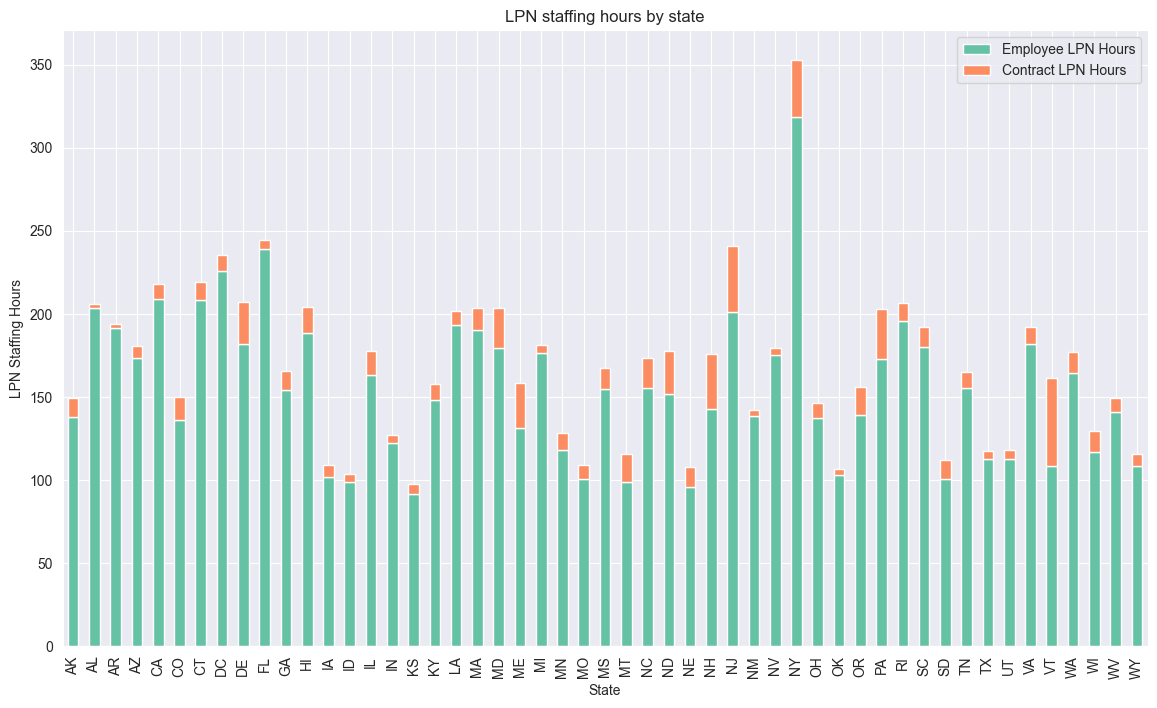

In [115]:
 # Stacked Bar Plot - CNA staffing levels by state
df_state_avg.plot.bar(x='STATE', y=['Hrs_CNA_emp', 'Hrs_CNA_ctr'], stacked=True, title='LPN staffing hours by state', figsize=(14, 8), color = sns.color_palette("Set2", n_colors=2))
plt.xlabel('State')
plt.ylabel('LPN Staffing Hours')
plt.legend(['Employee LPN Hours', 'Contract LPN Hours']) 
plt.show()

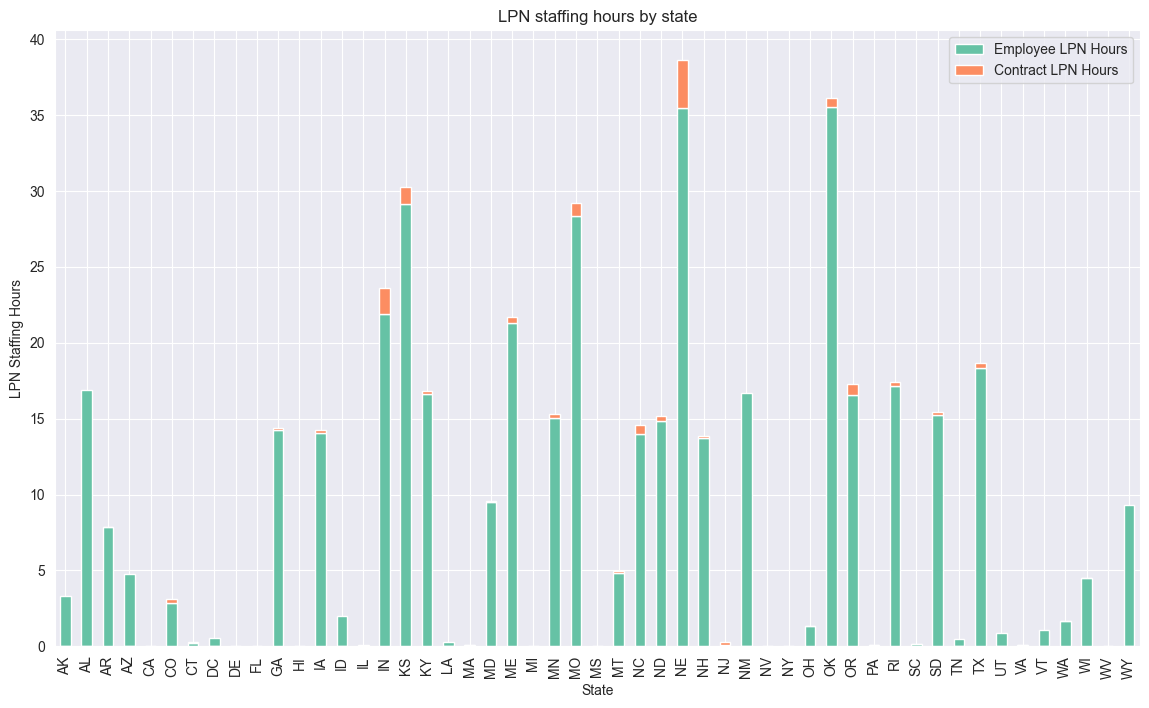

In [151]:
 # Stacked Bar Plot - MedAide staffing levels by state
df_state_avg.plot.bar(x='STATE', y=['Hrs_MedAide_emp', 'Hrs_MedAide_ctr'], stacked=True, title='LPN staffing hours by state', figsize=(14, 8))
plt.xlabel('State')
plt.ylabel('LPN Staffing Hours')
plt.legend(['Employee LPN Hours', 'Contract LPN Hours']) 
plt.show()

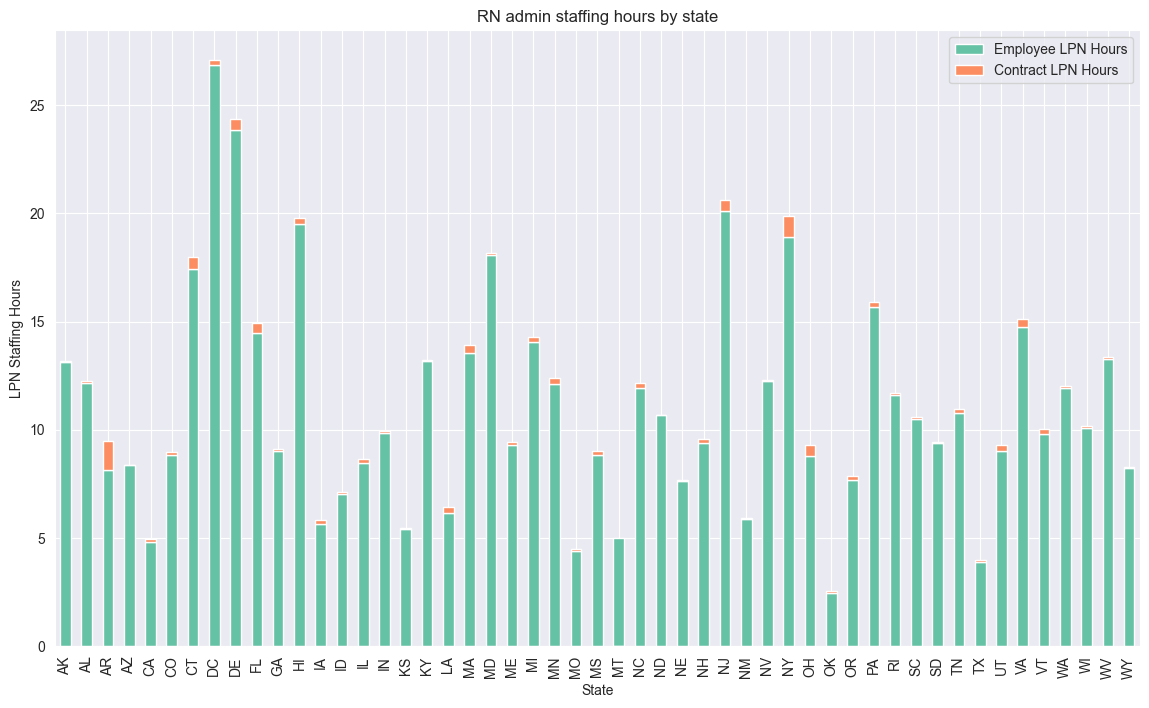

In [117]:
 # Stacked Bar Plot - RN Admin staffing levels by state
df_state_avg.plot.bar(x='STATE', y=['Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr'], stacked=True, title='RN admin staffing hours by state', figsize=(14, 8), color = sns.color_palette("Set2", n_colors=2))
plt.xlabel('State')
plt.ylabel('LPN Staffing Hours')
plt.legend(['Employee LPN Hours', 'Contract LPN Hours']) 
plt.show()

##### I was curious to see the amount of contract and full time workers used in each state. It's really hard to see any correlation as each state uses contract workers and its very similar accross the board. So far we have been exploring staffing levels and accross the states. lets start looking at facilities with high contract staffing levels and see if we find anything interesting. 

In [143]:
df_high_cntr = df_comp_clean_grp.where((df_comp_clean_grp['ratio_RN'] > .5) | (df_comp_clean_grp['ratio_RNadmin'] > .5) | (df_comp_clean_grp['ratio_LPN'] > .5) | (df_comp_clean_grp['ratio_LPNadmin'] > .5) | (df_comp_clean_grp['ratio_CNA'] > .5) | (df_comp_clean_grp['ratio_NAtrn'] > .5) | (df_comp_clean_grp['ratio_MedAide'] > .5)).dropna()

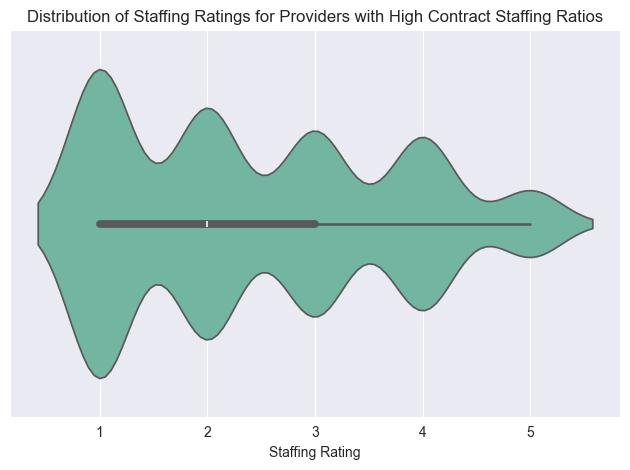

In [165]:
ax = sns.violinplot(x=df_high_cntr["Staffing Rating"])
ax.set_title("Distribution of Staffing Ratings for Providers with High Contract Staffing Ratios")
plt.xlabel("Staffing Rating")
plt.tight_layout()
plt.show()


In [176]:
df_high_cntr[['Staffing Rating', 'Overall Rating', 'Number of Certified Beds', 'Reported Total Nurse Staffing Hours per Resident per Day','Average Number of Residents per Day', 'Total Amount of Fines in Dollars']].describe()

Staffing Rating  Overall Rating  Number of Certified Beds  \
count      1764.000000     1764.000000               1764.000000   
mean          2.436130        2.444492                111.822940   
std           1.284896        1.356869                 69.339324   
min           1.000000        1.000000                 16.000000   
25%           1.000000        1.000000                 66.000000   
50%           2.000000        2.000000                100.000000   
75%           3.000000        3.333333                134.000000   
max           5.000000        5.000000                816.000000   

       Reported Total Nurse Staffing Hours per Resident per Day  \
count                                        1764.000000          
mean                                            3.670511          
std                                             0.882931          
min                                             0.027910          
25%                                             3.192487          
50%                                             3.563175          
75%                                             4.009790          
max                                            10.090500          

       Average Number of Residents per Day  Total Amount of Fines in Dollars  
count                          1764.000000                       1764.000000  
mean                             82.298923                      47030.859309  
std                              57.272033                      84990.257220  
min                              10.800000                          0.000000  
25%                              47.475000                        216.666667  
50%                              70.800000                      12814.585000  
75%                              99.650000                      50095.500000  
max                             728.500000                     740562.356667

##### There is a slight decrease in staffing rating if we have higher contract workers than full time staff. We still see the same reported total nursing hours per resident however we see these facilities pay a higher number of fines which is interesting. 

In [145]:
df_high_cntr_grp = df_high_cntr.groupby("STATE", as_index=False).mean(numeric_only=True)

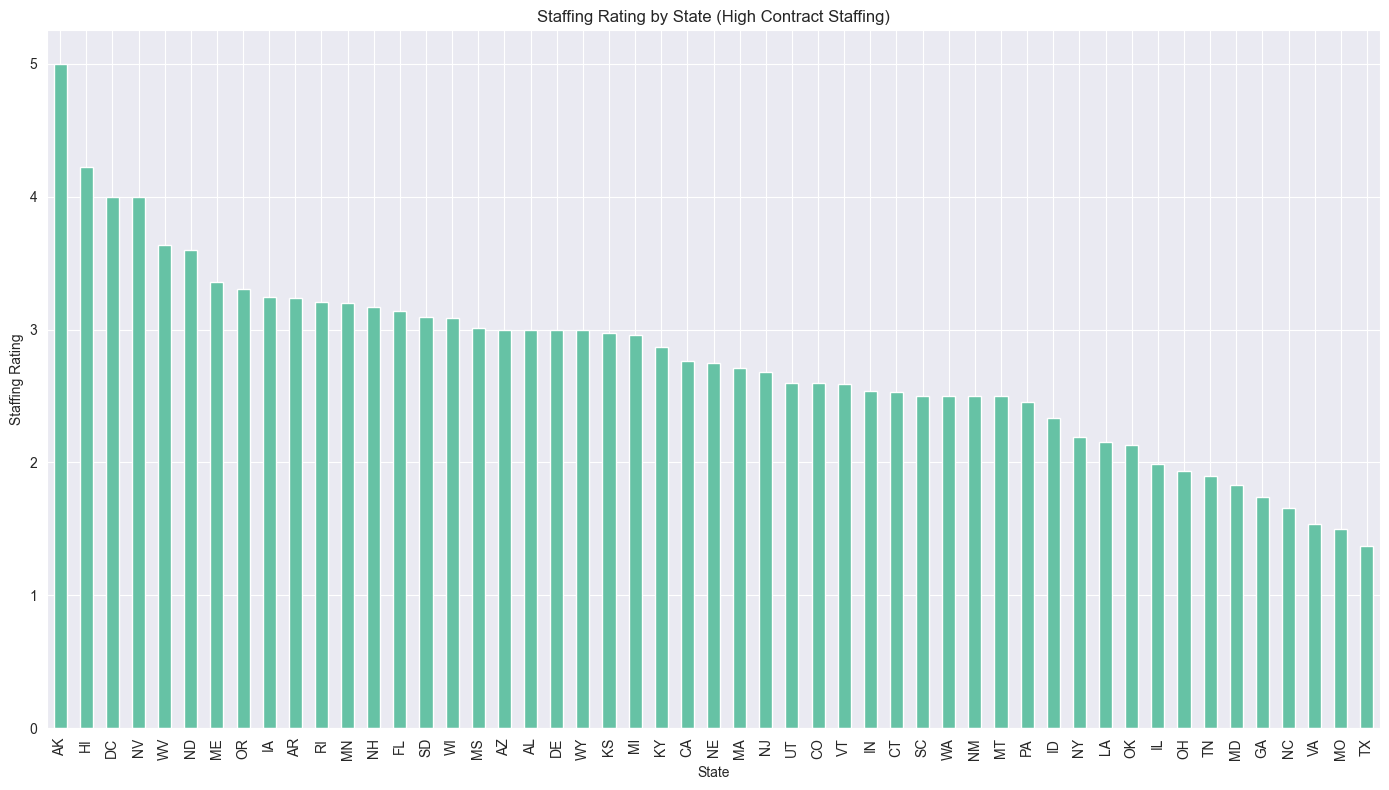

In [150]:
# Sort the DataFrame by 'Staffing Rating' in descending order
df_sorted = df_high_cntr_grp.sort_values(by='Staffing Rating', ascending=False)

# Plot the bar chart using the sorted DataFrame
df_sorted.plot.bar(
    x='STATE',
    y='Staffing Rating',
    title='Staffing Rating by State (High Contract Staffing)',
    figsize=(14, 8),
    legend=False 
)

plt.xlabel('State')
plt.ylabel('Staffing Rating')
plt.tight_layout()
plt.show()

<Axes: xlabel='Average Number of Residents per Day', ylabel='Reported Total Nurse Staffing Hours per Resident per Day'>

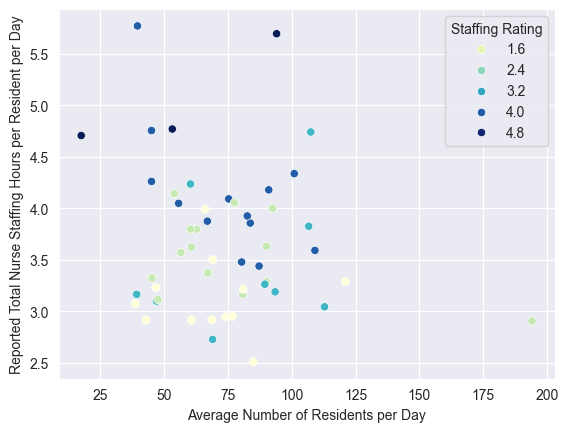

In [149]:
sns.scatterplot(x=df_high_cntr_grp['Average Number of Residents per Day'], y=df_comp_clean_grp['Reported Total Nurse Staffing Hours per Resident per Day'], hue=df_comp_clean_grp['Staffing Rating'], palette = "YlGnBu")


##### Alaska should be studies on how its a high rated staffing level with a high number of contract workers. There is definitely more to learn out of this dataset on how Alaska is achieving those Staffing Rating levels and I would save that for future analysis. We did a very good job on cleaning each dataset and merging to understand staffing levels and improving those ratings accross states/providers. There is a clear importance to staff more nursing per resident and keep a smaller number of residents per facility. This will improve care and reduce the amount of fines per facility. There is definitely a lot more analysis that can be done for the future. 

    - Analyze how states and facilities with a high proportion of contract workers achieve high staffing ratings.
    - Examine weekday vs. weekend staffing level trends to uncover potential variability in care delivery. 
    - Adding additional datasets to create a timeseries analysis. We only focused on Q2 however it would be interesting to add addtional months/years to do a month over month, quarter over quarter, year over year analysis. 
    - Apply machine learning techniques such as Principal Component Analysis (PCA) and K-Means clustering to identify patterns in staffing data and compare clustering results against staffing level ratings.